In [341]:
# importing necessary librarys
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import keras
import scikeras
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
#from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.neural_network import MLPRegressor
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Data Processing

---
### 2022
---

In [246]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2022\\JAR_FA_RODIKLIAI_BLNS_2023.csv",sep=',')
dfBLN.head(2)

obj_kodas                                  obj_pav  form_kodas  \
0  110003978  Uždaroji akcinė bendrovė "Lietkompexim"         310   
1  110004884        Uždaroji akcinė bendrovė "VILLON"         310   

   stat_statusas template_id  \
0              0      FS0229   
1              0      FS0618   

                                       template_name standard_id  \
0  Mažų ir labai mažų įmonių, netaikančių išimčių...      BST124   
1  Atskirosios finansinės būklės ataskaitos duomenys      BST210   

             standard_name laikotarpis_nuo laikotarpis_iki    reg_date  \
0  BALANSAS (Sutrumpintas)      01/01/2022      31/12/2022  2023-05-24   
1                 BALANSAS      01/01/2022      31/12/2022  2023-06-30   

   nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  \
0           1735011.0                       28549.0           657695.0   
1           2632537.0                           NaN         38524426.0   

   trumpalaikis_turtas formavimo_data  
0            1105067.0     2023-12-11  
1             671510.0     2023-12-11

In [247]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2022\\JAR_FA_RODIKLIAI_PLNA_2023.csv",sep=',')
dfPLNA.head(2)

obj_kodas                                  obj_pav  form_kodas  \
0  110003978  Uždaroji akcinė bendrovė "Lietkompexim"         310   
1  110004884        Uždaroji akcinė bendrovė "VILLON"         310   

                   form_pav  stat_statusas                       stat_pav  \
0  Uždaroji akcinė bendrovė              0  Teisinis stat neįregistruotas   
1  Uždaroji akcinė bendrovė              0  Teisinis stat neįregistruotas   

  template_id                                      template_name standard_id  \
0      FS0229  Mažų ir labai mažų įmonių, netaikančių išimčių...      IST024   
1      FS0618  Atskirosios finansinės būklės ataskaitos duomenys      IST209   

                                      standard_name laikotarpis_nuo  \
0                       PELNO (NUOSTOLIŲ) ATASKAITA      01/01/2022   
1  PELNO (NUOSTOLIŲ) ATASKAITA (sąnaudų paskirties)      01/01/2022   

  laikotarpis_iki    reg_date  pelnas_pries_apmokestinima  grynasis_pelnas  \
0      31/12/2022  24/05/2023                     15420.0          13104.0   
1      31/12/2022  30/06/2023                   -824210.0              NaN   

   pardavimo_pajamos formavimo_data  
0            65196.0     11/12/2023  
1          8359577.0     11/12/2023

In [248]:
# reading given data and visualizing it
dfRating = pd.read_csv("2022\\ratings.csv",sep=',')
dfRating.head(2)

Financial Report Name  obj_kodas Company Reg. No.: Business Name  \
0  FS-NO-979682417-2022  979682417         MÖBELRINGEN P LARSEN AS   
1  FS-NO-979682417-2021  979682417         MÖBELRINGEN P LARSEN AS   

  Company Reg. No.: Name from Register  Year (as Number) laikotarpis_nuo  \
0              MÖBELRINGEN P LARSEN AS              2022      01/01/2022   
1              MÖBELRINGEN P LARSEN AS              2021      01/01/2021   

    Till Date  Annual Rating Value Annual Rating Group  
0  31/12/2022                 2.23                   B  
1  31/12/2021                 1.57                   B

In [249]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

obj_kodas                                obj_pav_x  form_kodas_x  \
0  110003978  Uždaroji akcinė bendrovė "Lietkompexim"           310   
1  110004884        Uždaroji akcinė bendrovė "VILLON"           310   

   stat_statusas_x template_id_x  \
0                0        FS0229   
1                0        FS0618   

                                     template_name_x standard_id_x  \
0  Mažų ir labai mažų įmonių, netaikančių išimčių...        BST124   
1  Atskirosios finansinės būklės ataskaitos duomenys        BST210   

           standard_name_x laikotarpis_nuo laikotarpis_iki_x  reg_date_x  \
0  BALANSAS (Sutrumpintas)      01/01/2022        31/12/2022  2023-05-24   
1                 BALANSAS      01/01/2022        31/12/2022  2023-06-30   

   nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  \
0           1735011.0                       28549.0           657695.0   
1           2632537.0                           NaN         38524426.0   

   trumpalaikis_turtas formavimo_data_x  \
0            1105067.0       2023-12-11   
1             671510.0       2023-12-11   

                                 obj_pav_y  form_kodas_y  \
0  Uždaroji akcinė bendrovė "Lietkompexim"           310   
1        Uždaroji akcinė bendrovė "VILLON"           310   

                   form_pav  stat_statusas_y                       stat_pav  \
0  Uždaroji akcinė bendrovė                0  Teisinis stat neįregistruotas   
1  Uždaroji akcinė bendrovė                0  Teisinis stat neįregistruotas   

  template_id_y                                    template_name_y  \
0        FS0229  Mažų ir labai mažų įmonių, netaikančių išimčių...   
1        FS0618  Atskirosios finansinės būklės ataskaitos duomenys   

  standard_id_y                                   standard_name_y  \
0        IST024                       PELNO (NUOSTOLIŲ) ATASKAITA   
1        IST209  PELNO (NUOSTOLIŲ) ATASKAITA (sąnaudų paskirties)   

  laikotarpis_iki_y  reg_date_y  pelnas_pries_apmokestinima  grynasis_pelnas  \
0        31/12/2022  24/05/2023                     15420.0          13104.0   
1        31/12/2022  30/06/2023                   -824210.0              NaN   

   pardavimo_pajamos formavimo_data_y  
0            65196.0       11/12/2023  
1          8359577.0       11/12/2023

In [250]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','stat_statusas_y'], axis=1)


In [251]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

obj_kodas                                obj_pav_x  form_kodas_x  \
0  110003978  Uždaroji akcinė bendrovė "Lietkompexim"           310   
1  110004884        Uždaroji akcinė bendrovė "VILLON"           310   

   stat_statusas_x laikotarpis_nuo laikotarpis_iki_x  reg_date_x  \
0                0      01/01/2022        31/12/2022  2023-05-24   
1                0      01/01/2022        31/12/2022  2023-06-30   

   nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  \
0           1735011.0                       28549.0           657695.0   
1           2632537.0                           NaN         38524426.0   

   trumpalaikis_turtas                  form_pav  \
0            1105067.0  Uždaroji akcinė bendrovė   
1             671510.0  Uždaroji akcinė bendrovė   

                        stat_pav  pelnas_pries_apmokestinima  grynasis_pelnas  \
0  Teisinis stat neįregistruotas                     15420.0          13104.0   
1  Teisinis stat neįregistruotas                   -824210.0              NaN   

   pardavimo_pajamos formavimo_data_y  
0            65196.0       11/12/2023  
1          8359577.0       11/12/2023

In [252]:
df2022 = dfRating.merge(df1, on=["obj_kodas","laikotarpis_nuo"], how='inner')
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 987 non-null    object 
 1   obj_kodas                             987 non-null    int64  
 2   Company Reg. No.: Business Name       983 non-null    object 
 3   Company Reg. No.: Name from Register  986 non-null    object 
 4   Year (as Number)                      987 non-null    int64  
 5   laikotarpis_nuo                       987 non-null    object 
 6   Till Date                             987 non-null    object 
 7   Annual Rating Value                   987 non-null    float64
 8   Annual Rating Group                   987 non-null    object 
 9   obj_pav_x                             987 non-null    object 
 10  form_kodas_x                          987 non-null    int64  
 11  stat_statusas_x    

In [253]:
# # Drop rows with NaN values in both 'X' and 'Y' columns
# df2022 = df2022[~(df2022['nuosavas_kapitalas'].isna() | df2022['mok_sumos_ir_isipareigojimai'].isna() | df2022['ilgalaikis_turtas'].isna() | df2022['trumpalaikis_turtas'].isna() | df2022['pelnas_pries_apmokestinima'].isna() | df2022['grynasis_pelnas'].isna() | df2022['pardavimo_pajamos'].isna())]
# df2022.reset_index(drop=True, inplace=True)
# df2022.info()

---
### 2021
---

In [254]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2021\\JAR_FA_BLNS_2022.csv",sep=',')
dfBLN.head(2)

obj_kodas                 obj_pav  form_kodas                  form_pav  \
0  302635624  UAB "Verslo krepšelis"         310  Uždaroji akcinė bendrovė   
1  304715624          UAB "Donstone"         310  Uždaroji akcinė bendrovė   

   stat_statusas                       stat_pav template_id  \
0              0  Teisinis stat neįregistruotas      FS0128   
1              0  Teisinis stat neįregistruotas      FS0129   

                                       template_name standard_id  \
0  Labai mažų įmonių, taikančių išimtis, finansin...      BST122   
1  Mažų ir labai mažų įmonių, netaikančių išimčių...      BST124   

             standard_name laikotarpis_nuo laikotarpis_iki    reg_date  \
0       BALANSAS (Trumpas)      01/01/2021      31/12/2021  21/10/2022   
1  BALANSAS (Sutrumpintas)      01/01/2021      31/12/2021  04/05/2022   

   nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  \
0              2884.0                          12.0                0.0   
1              5831.0                      157443.0            52022.0   

   trumpalaikis_turtas formavimo_data  
0               2896.0     01/03/2023  
1             111252.0     01/03/2023

In [255]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2021\\JAR_FA_PLNA_2022.csv",sep=',')
dfPLNA.head(2)

obj_kodas                     obj_pav  form_kodas  \
0  301011561               UAB "Rustela"         310   
1  303641352  UAB "Globali technologija"         310   

                   form_pav  stat_statusas                       stat_pav  \
0  Uždaroji akcinė bendrovė              0  Teisinis stat neįregistruotas   
1  Uždaroji akcinė bendrovė              0  Teisinis stat neįregistruotas   

  template_id                                      template_name standard_id  \
0      FS0129  Mažų ir labai mažų įmonių, netaikančių išimčių...      IST024   
1      FS0129  Mažų ir labai mažų įmonių, netaikančių išimčių...      IST024   

                 standard_name laikotarpis_nuo laikotarpis_iki    reg_date  \
0  PELNO (NUOSTOLIŲ) ATASKAITA      01/01/2021      31/12/2021  02/01/2022   
1  PELNO (NUOSTOLIŲ) ATASKAITA      01/01/2021      31/12/2021  27/05/2022   

   pelnas_pries_apmokestinima  grynasis_pelnas  pardavimo_pajamos  \
0                       -91.0            -91.0                NaN   
1                         0.0              0.0                NaN   

  formavimo_data  
0     01/03/2023  
1     01/03/2023

In [256]:
# reading given data and visualizing it
dfRating = pd.read_csv("2021\\ratings.csv",sep=',')
dfRating.head(2)

Financial Report Name  obj_kodas Company Reg. No.: Business Name  \
0  FS-NO-979682417-2022  979682417         MÖBELRINGEN P LARSEN AS   
1  FS-NO-979682417-2021  979682417         MÖBELRINGEN P LARSEN AS   

  Company Reg. No.: Name from Register  Year (as Number) laikotarpis_nuo  \
0              MÖBELRINGEN P LARSEN AS              2022      01/01/2022   
1              MÖBELRINGEN P LARSEN AS              2021      01/01/2021   

    Till Date  Annual Rating Value Annual Rating Group  
0  31/12/2022                 2.23                   B  
1  31/12/2021                 1.57                   B

In [257]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

obj_kodas               obj_pav_x  form_kodas_x                form_pav_x  \
0  302635624  UAB "Verslo krepšelis"           310  Uždaroji akcinė bendrovė   
1  304715624          UAB "Donstone"           310  Uždaroji akcinė bendrovė   

   stat_statusas_x                     stat_pav_x template_id_x  \
0                0  Teisinis stat neįregistruotas        FS0128   
1                0  Teisinis stat neįregistruotas        FS0129   

                                     template_name_x standard_id_x  \
0  Labai mažų įmonių, taikančių išimtis, finansin...        BST122   
1  Mažų ir labai mažų įmonių, netaikančių išimčių...        BST124   

           standard_name_x laikotarpis_nuo laikotarpis_iki_x  reg_date_x  \
0       BALANSAS (Trumpas)      01/01/2021        31/12/2021  21/10/2022   
1  BALANSAS (Sutrumpintas)      01/01/2021        31/12/2021  04/05/2022   

   nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  \
0              2884.0                          12.0                0.0   
1              5831.0                      157443.0            52022.0   

   trumpalaikis_turtas formavimo_data_x               obj_pav_y  form_kodas_y  \
0               2896.0       01/03/2023  UAB "Verslo krepšelis"           310   
1             111252.0       01/03/2023          UAB "Donstone"           310   

                 form_pav_y  stat_statusas_y                     stat_pav_y  \
0  Uždaroji akcinė bendrovė                0  Teisinis stat neįregistruotas   
1  Uždaroji akcinė bendrovė                0  Teisinis stat neįregistruotas   

  template_id_y                                    template_name_y  \
0        FS0128  Labai mažų įmonių, taikančių išimtis, finansin...   
1        FS0129  Mažų ir labai mažų įmonių, netaikančių išimčių...   

  standard_id_y                       standard_name_y laikotarpis_iki_y  \
0        IST023  PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa)        31/12/2021   
1        IST024           PELNO (NUOSTOLIŲ) ATASKAITA        31/12/2021   

   reg_date_y  pelnas_pries_apmokestinima  grynasis_pelnas  pardavimo_pajamos  \
0  21/10/2022                         NaN            -12.0                NaN   
1  04/05/2022                      4595.0           4360.0           101058.0   

  formavimo_data_y  
0       01/03/2023  
1       01/03/2023

In [258]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','stat_pav_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','form_pav_y','stat_statusas_y'], axis=1)


In [259]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

obj_kodas               obj_pav_x  form_kodas_x                form_pav_x  \
0  302635624  UAB "Verslo krepšelis"           310  Uždaroji akcinė bendrovė   
1  304715624          UAB "Donstone"           310  Uždaroji akcinė bendrovė   

   stat_statusas_x                     stat_pav_x laikotarpis_nuo  \
0                0  Teisinis stat neįregistruotas      01/01/2021   
1                0  Teisinis stat neįregistruotas      01/01/2021   

  laikotarpis_iki_x  reg_date_x  nuosavas_kapitalas  \
0        31/12/2021  21/10/2022              2884.0   
1        31/12/2021  04/05/2022              5831.0   

   mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  trumpalaikis_turtas  \
0                          12.0                0.0               2896.0   
1                      157443.0            52022.0             111252.0   

   pelnas_pries_apmokestinima  grynasis_pelnas  pardavimo_pajamos  \
0                         NaN            -12.0                NaN   
1                      4595.0           4360.0           101058.0   

  formavimo_data_y  
0       01/03/2023  
1       01/03/2023

In [260]:
df = dfRating.merge(df1, on=["obj_kodas","laikotarpis_nuo"], how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 2245 non-null   object 
 1   obj_kodas                             2245 non-null   int64  
 2   Company Reg. No.: Business Name       2243 non-null   object 
 3   Company Reg. No.: Name from Register  2242 non-null   object 
 4   Year (as Number)                      2245 non-null   int64  
 5   laikotarpis_nuo                       2245 non-null   object 
 6   Till Date                             2245 non-null   object 
 7   Annual Rating Value                   2245 non-null   float64
 8   Annual Rating Group                   2245 non-null   object 
 9   obj_pav_x                             2245 non-null   object 
 10  form_kodas_x                          2245 non-null   int64  
 11  form_pav_x       

In [261]:
# # Drop rows with NaN values in both 'X' and 'Y' columns
# df = df[~(df['nuosavas_kapitalas'].isna() | df['mok_sumos_ir_isipareigojimai'].isna() | df['ilgalaikis_turtas'].isna() | df['trumpalaikis_turtas'].isna() | df['pelnas_pries_apmokestinima'].isna() | df['grynasis_pelnas'].isna() | df['pardavimo_pajamos'].isna())]
# df.reset_index(drop=True, inplace=True)
# df.info()

-------
### 2020
-------

In [262]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2020\\JAR_FA_RODIKLIAI_PLNA_2021.csv",sep=',')
dfBLN.head(2)

obj_kodas         obj_pav  form_kodas                  form_pav  \
0  305390322  UAB "Klaineda"         310  Uždaroji akcinė bendrovė   
1  305213076   UAB "Danosta"         310  Uždaroji akcinė bendrovė   

   stat_statusas                       stat_pav template_id  \
0              0  Teisinis stat neįregistruotas      FS0128   
1              0  Teisinis stat neįregistruotas      FS0128   

                                       template_name standard_id  \
0  Labai mažų įmonių, taikančių išimtis, finansin...      IST023   
1  Labai mažų įmonių, taikančių išimtis, finansin...      IST023   

                          standard_name laikotarpis_nuo laikotarpis_iki  \
0  PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa)      11/12/2019      31/12/2019   
1  PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa)      18/07/2019      31/12/2019   

     reg_date  pelnas_pries_apmokestinima  grynasis_pelnas  pardavimo_pajamos  \
0  27/05/2021                         NaN              0.0                NaN   
1  08/09/2021                         NaN          -8042.0                NaN   

  formavimo_data  
0     01/03/2023  
1     01/03/2023

In [263]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2020\\JAR_FA_RODIKLIAI_BLNS_2021.csv",sep=',')
dfPLNA.head(2)

obj_kodas                            obj_pav  form_kodas  \
0  303503376                    MB "Edva ir ko"         960   
1  122752323  Uždaroji akcinė bendrovė "ELGENA"         310   

                   form_pav  stat_statusas                       stat_pav  \
0           Mažoji bendrija              0  Teisinis stat neįregistruotas   
1  Uždaroji akcinė bendrovė              1               Reorganizuojamas   

  template_id                                      template_name standard_id  \
0      FS0322      Mažųjų bendrijų finansinių ataskaitų rinkinys      BST217   
1      FS0128  Labai mažų įmonių, taikančių išimtis, finansin...      BST122   

                                       standard_name laikotarpis_nuo  \
0  BALANSAS (Neribotos civilinės atsakomybės juri...      01/01/2020   
1                                 BALANSAS (Trumpas)      01/01/2017   

  laikotarpis_iki    reg_date  nuosavas_kapitalas  \
0      31/12/2020  26/04/2021             34663.0   
1      31/12/2017  13/04/2021              3285.0   

   mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  trumpalaikis_turtas  \
0                           NaN            77286.0              49060.0   
1                        4757.0             1374.0               6668.0   

  formavimo_data  
0     01/03/2023  
1     01/03/2023

In [264]:
# reading given data and visualizing it
dfRating = pd.read_csv("2020\\ratings.csv",sep=',')
dfRating.head(2)

Financial Report Name  obj_kodas Company Reg. No.: Business Name  \
0  FS-NO-979682417-2022  979682417         MÖBELRINGEN P LARSEN AS   
1  FS-NO-979682417-2021  979682417         MÖBELRINGEN P LARSEN AS   

  Company Reg. No.: Name from Register  Year (as Number) laikotarpis_nuo  \
0              MÖBELRINGEN P LARSEN AS              2022      01/01/2022   
1              MÖBELRINGEN P LARSEN AS              2021      01/01/2021   

    Till Date  Annual Rating Value Annual Rating Group  
0  31/12/2022                 2.23                   B  
1  31/12/2021                 1.57                   B

In [265]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

obj_kodas       obj_pav_x  form_kodas_x                form_pav_x  \
0  305390322  UAB "Klaineda"           310  Uždaroji akcinė bendrovė   
1  305213076   UAB "Danosta"           310  Uždaroji akcinė bendrovė   

   stat_statusas_x                     stat_pav_x template_id_x  \
0                0  Teisinis stat neįregistruotas        FS0128   
1                0  Teisinis stat neįregistruotas        FS0128   

                                     template_name_x standard_id_x  \
0  Labai mažų įmonių, taikančių išimtis, finansin...        IST023   
1  Labai mažų įmonių, taikančių išimtis, finansin...        IST023   

                        standard_name_x laikotarpis_nuo laikotarpis_iki_x  \
0  PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa)      11/12/2019        31/12/2019   
1  PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa)      18/07/2019        31/12/2019   

   reg_date_x  pelnas_pries_apmokestinima  grynasis_pelnas  pardavimo_pajamos  \
0  27/05/2021                         NaN              0.0                NaN   
1  08/09/2021                         NaN          -8042.0                NaN   

  formavimo_data_x       obj_pav_y  form_kodas_y                form_pav_y  \
0       01/03/2023  UAB "Klaineda"           310  Uždaroji akcinė bendrovė   
1       01/03/2023   UAB "Danosta"           310  Uždaroji akcinė bendrovė   

   stat_statusas_y                     stat_pav_y template_id_y  \
0                0  Teisinis stat neįregistruotas        FS0128   
1                0  Teisinis stat neįregistruotas        FS0128   

                                     template_name_y standard_id_y  \
0  Labai mažų įmonių, taikančių išimtis, finansin...        BST122   
1  Labai mažų įmonių, taikančių išimtis, finansin...        BST122   

      standard_name_y laikotarpis_iki_y  reg_date_y  nuosavas_kapitalas  \
0  BALANSAS (Trumpas)        31/12/2019  27/05/2021              2500.0   
1  BALANSAS (Trumpas)        31/12/2019  08/09/2021             -5542.0   

   mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  trumpalaikis_turtas  \
0                           0.0                0.0               2500.0   
1                        8188.0                0.0               2646.0   

  formavimo_data_y  
0       01/03/2023  
1       01/03/2023

In [266]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','stat_pav_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','form_pav_y','stat_statusas_y'], axis=1)


In [267]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

obj_kodas       obj_pav_x  form_kodas_x                form_pav_x  \
0  305390322  UAB "Klaineda"           310  Uždaroji akcinė bendrovė   
1  305213076   UAB "Danosta"           310  Uždaroji akcinė bendrovė   

   stat_statusas_x                     stat_pav_x laikotarpis_nuo  \
0                0  Teisinis stat neįregistruotas      11/12/2019   
1                0  Teisinis stat neįregistruotas      18/07/2019   

  laikotarpis_iki_x  reg_date_x  pelnas_pries_apmokestinima  grynasis_pelnas  \
0        31/12/2019  27/05/2021                         NaN              0.0   
1        31/12/2019  08/09/2021                         NaN          -8042.0   

   pardavimo_pajamos  nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  \
0                NaN              2500.0                           0.0   
1                NaN             -5542.0                        8188.0   

   ilgalaikis_turtas  trumpalaikis_turtas formavimo_data_y  
0                0.0               2500.0       01/03/2023  
1                0.0               2646.0       01/03/2023

In [268]:
df2020 = dfRating.merge(df1, on=["obj_kodas","laikotarpis_nuo"], how='inner')
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 2283 non-null   object 
 1   obj_kodas                             2283 non-null   int64  
 2   Company Reg. No.: Business Name       2281 non-null   object 
 3   Company Reg. No.: Name from Register  2280 non-null   object 
 4   Year (as Number)                      2283 non-null   int64  
 5   laikotarpis_nuo                       2283 non-null   object 
 6   Till Date                             2283 non-null   object 
 7   Annual Rating Value                   2283 non-null   float64
 8   Annual Rating Group                   2283 non-null   object 
 9   obj_pav_x                             2283 non-null   object 
 10  form_kodas_x                          2283 non-null   int64  
 11  form_pav_x       

In [269]:
# # Drop rows with NaN values in both 'X' and 'Y' columns
# df2020 = df2020[~(df2020['nuosavas_kapitalas'].isna() | df2020['mok_sumos_ir_isipareigojimai'].isna() | df2020['ilgalaikis_turtas'].isna() | df2020['trumpalaikis_turtas'].isna() | df2020['pelnas_pries_apmokestinima'].isna() | df2020['grynasis_pelnas'].isna() | df2020['pardavimo_pajamos'].isna())]
# df2020.reset_index(drop=True, inplace=True)
# df2020.info()

-------
### 2019
-------

In [270]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2019\\JAR_FA_RODIKLIAI_PLNA_2020.csv",sep=',')
dfBLN.head(2)

obj_kodas           obj_pav  form_kodas                  form_pav  \
0  304406916  UAB "Geostudija"         310  Uždaroji akcin? bendrov?   
1  304064380      UAB "Darika"         310  Uždaroji akcin? bendrov?   

   stat_statusas                       stat_pav template_id  \
0              0  Teisinis stat ne?registruotas      FS0129   
1              0  Teisinis stat ne?registruotas      FS0128   

                                       template_name standard_id  \
0  Maž? ir labai maž? ?moni?, netaikan?i? išim?i?...      IST024   
1  Labai maž? ?moni?, taikan?i? išimtis, finansin...      IST023   

                          standard_name laikotarpis_nuo laikotarpis_iki  \
0           PELNO (NUOSTOLI?) ATASKAITA      01/01/2019      31/12/2019   
1  PELNO (NUOSTOLI?) ATASKAITA (Trumpa)      01/01/2018      31/12/2018   

     reg_date  pelnas_pries_apmokestinima  grynasis_pelnas  pardavimo_pajamos  \
0  30/04/2020                    119356.0         113384.0           182596.0   
1  14/06/2020                         NaN            479.0            17406.0   

  formavimo_data  
0     01/03/2023  
1     01/03/2023

In [271]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2019\\JAR_FA_RODIKLIAI_BLNS_2020.csv",sep=',')
dfPLNA.head(2)

obj_kodas                obj_pav  form_kodas                  form_pav  \
0  303263543          UAB "Korneta"         310  Uždaroji akcin? bendrov?   
1  303080378  UAB "Protingesnis Lt"         310  Uždaroji akcin? bendrov?   

   stat_statusas                       stat_pav template_id  \
0              0  Teisinis stat ne?registruotas      FS0129   
1              0  Teisinis stat ne?registruotas      FS0129   

                                       template_name standard_id  \
0  Maž? ir labai maž? ?moni?, netaikan?i? išim?i?...      BST124   
1  Maž? ir labai maž? ?moni?, netaikan?i? išim?i?...      BST124   

             standard_name laikotarpis_nuo laikotarpis_iki    reg_date  \
0  BALANSAS (Sutrumpintas)      01/01/2019      31/12/2019  27/05/2020   
1  BALANSAS (Sutrumpintas)      01/01/2019      31/12/2019  13/05/2020   

   nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  \
0             -3488.0                       11756.0                0.0   
1             63268.0                      112830.0            18106.0   

   trumpalaikis_turtas formavimo_data  
0               8048.0     01/03/2023  
1             157992.0     01/03/2023

In [272]:
# reading given data and visualizing it
dfRating = pd.read_csv("2019\\ratings.csv",sep=',')
dfRating.head(2)

Financial Report Name  obj_kodas Company Reg. No.: Business Name  \
0  FS-NO-979682417-2022  979682417         MÖBELRINGEN P LARSEN AS   
1  FS-NO-979682417-2021  979682417         MÖBELRINGEN P LARSEN AS   

  Company Reg. No.: Name from Register  Year (as Number) laikotarpis_nuo  \
0              MÖBELRINGEN P LARSEN AS              2022      01/01/2022   
1              MÖBELRINGEN P LARSEN AS              2021      01/01/2021   

    Till Date  Annual Rating Value Annual Rating Group  
0  31/12/2022                 2.23                   B  
1  31/12/2021                 1.57                   B

In [273]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

obj_kodas         obj_pav_x  form_kodas_x                form_pav_x  \
0  304406916  UAB "Geostudija"           310  Uždaroji akcin? bendrov?   
1  304064380      UAB "Darika"           310  Uždaroji akcin? bendrov?   

   stat_statusas_x                     stat_pav_x template_id_x  \
0                0  Teisinis stat ne?registruotas        FS0129   
1                0  Teisinis stat ne?registruotas        FS0128   

                                     template_name_x standard_id_x  \
0  Maž? ir labai maž? ?moni?, netaikan?i? išim?i?...        IST024   
1  Labai maž? ?moni?, taikan?i? išimtis, finansin...        IST023   

                        standard_name_x laikotarpis_nuo laikotarpis_iki_x  \
0           PELNO (NUOSTOLI?) ATASKAITA      01/01/2019        31/12/2019   
1  PELNO (NUOSTOLI?) ATASKAITA (Trumpa)      01/01/2018        31/12/2018   

   reg_date_x  pelnas_pries_apmokestinima  grynasis_pelnas  pardavimo_pajamos  \
0  30/04/2020                    119356.0         113384.0           182596.0   
1  14/06/2020                         NaN            479.0            17406.0   

  formavimo_data_x         obj_pav_y  form_kodas_y                form_pav_y  \
0       01/03/2023  UAB "Geostudija"           310  Uždaroji akcin? bendrov?   
1       01/03/2023      UAB "Darika"           310  Uždaroji akcin? bendrov?   

   stat_statusas_y                     stat_pav_y template_id_y  \
0                0  Teisinis stat ne?registruotas        FS0129   
1                0  Teisinis stat ne?registruotas        FS0128   

                                     template_name_y standard_id_y  \
0  Maž? ir labai maž? ?moni?, netaikan?i? išim?i?...        BST124   
1  Labai maž? ?moni?, taikan?i? išimtis, finansin...        BST122   

           standard_name_y laikotarpis_iki_y  reg_date_y  nuosavas_kapitalas  \
0  BALANSAS (Sutrumpintas)        31/12/2019  30/04/2020            219835.0   
1       BALANSAS (Trumpas)        31/12/2018  14/06/2020              6721.0   

   mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  trumpalaikis_turtas  \
0                       22728.0            18230.0             227817.0   
1                           0.0              242.0               6479.0   

  formavimo_data_y  
0       01/03/2023  
1       01/03/2023

In [274]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','stat_pav_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','form_pav_y','stat_statusas_y'], axis=1)


In [275]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

obj_kodas         obj_pav_x  form_kodas_x                form_pav_x  \
0  304406916  UAB "Geostudija"           310  Uždaroji akcin? bendrov?   
1  304064380      UAB "Darika"           310  Uždaroji akcin? bendrov?   

   stat_statusas_x                     stat_pav_x laikotarpis_nuo  \
0                0  Teisinis stat ne?registruotas      01/01/2019   
1                0  Teisinis stat ne?registruotas      01/01/2018   

  laikotarpis_iki_x  reg_date_x  pelnas_pries_apmokestinima  grynasis_pelnas  \
0        31/12/2019  30/04/2020                    119356.0         113384.0   
1        31/12/2018  14/06/2020                         NaN            479.0   

   pardavimo_pajamos  nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  \
0           182596.0            219835.0                       22728.0   
1            17406.0              6721.0                           0.0   

   ilgalaikis_turtas  trumpalaikis_turtas formavimo_data_y  
0            18230.0             227817.0       01/03/2023  
1              242.0               6479.0       01/03/2023

In [276]:
df2019 = dfRating.merge(df1, on=["obj_kodas","laikotarpis_nuo"], how='inner')
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 1839 non-null   object 
 1   obj_kodas                             1839 non-null   int64  
 2   Company Reg. No.: Business Name       1838 non-null   object 
 3   Company Reg. No.: Name from Register  1838 non-null   object 
 4   Year (as Number)                      1839 non-null   int64  
 5   laikotarpis_nuo                       1839 non-null   object 
 6   Till Date                             1839 non-null   object 
 7   Annual Rating Value                   1839 non-null   float64
 8   Annual Rating Group                   1839 non-null   object 
 9   obj_pav_x                             1839 non-null   object 
 10  form_kodas_x                          1839 non-null   int64  
 11  form_pav_x       

In [277]:
# # Drop rows with NaN values in both 'X' and 'Y' columns
# df2019 = df2019[~(df2019['nuosavas_kapitalas'].isna() | df2019['mok_sumos_ir_isipareigojimai'].isna() | df2019['ilgalaikis_turtas'].isna() | df2019['trumpalaikis_turtas'].isna() | df2019['pelnas_pries_apmokestinima'].isna() | df2019['grynasis_pelnas'].isna() | df2019['pardavimo_pajamos'].isna())]
# df2019.reset_index(drop=True, inplace=True)
# df2019.info()

-------
### 2018
-------

In [278]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2018\\JAR_FA_RODIKLIAI_PLNA_2019.csv",sep=',')
dfBLN.head(2)

obj_kodas                   obj_pav  form_kodas                  form_pav  \
0  301098769  UAB "Klaipėdos finartas"         310  Uždaroji akcinė bendrovė   
1  148399916            UAB "PROFIBUS"         310  Uždaroji akcinė bendrovė   

   stat_statusas                       stat_pav template_id  \
0              0  Teisinis stat neįregistruotas      FS0128   
1              0  Teisinis stat neįregistruotas      FS0129   

                                       template_name standard_id  \
0  Labai mažų įmonių, taikančių išimtis, finansin...      IST023   
1  Mažų ir labai mažų įmonių, netaikančių išimčių...      IST024   

                          standard_name laikotarpis_nuo laikotarpis_iki  \
0  PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa)      01/01/2018      31/12/2018   
1           PELNO (NUOSTOLIŲ) ATASKAITA      01/01/2018      31/12/2018   

     reg_date  pelnas_pries_apmokestinima  grynasis_pelnas  pardavimo_pajamos  \
0  14/05/2019                         NaN          -9799.0            44868.0   
1  22/05/2019                    104700.0          88977.0           978530.0   

  formavimo_data  
0     01/03/2023  
1     01/03/2023

In [279]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2018\\JAR_FA_RODIKLIAI_BLNS_2019.csv",sep=',')
dfPLNA.head(2)

obj_kodas                                         obj_pav  form_kodas  \
0  120061894     Uždaroji akcinė bendrovė "VILNIAUS STIKLAS"         310   
1  169956852  Uždaroji akcinė bendrovė "Litodos galanterija"         310   

                   form_pav  stat_statusas                       stat_pav  \
0  Uždaroji akcinė bendrovė              0  Teisinis stat neįregistruotas   
1  Uždaroji akcinė bendrovė              0  Teisinis stat neįregistruotas   

  template_id                                      template_name standard_id  \
0      FS0129  Mažų ir labai mažų įmonių, netaikančių išimčių...      BST124   
1      FS0129  Mažų ir labai mažų įmonių, netaikančių išimčių...      BST124   

             standard_name laikotarpis_nuo laikotarpis_iki    reg_date  \
0  BALANSAS (Sutrumpintas)      01/01/2018      31/12/2018  10/05/2019   
1  BALANSAS (Sutrumpintas)      01/01/2018      31/12/2018  31/05/2019   

   nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  \
0            161377.0                       52777.0           149469.0   
1             34255.0                       18634.0             1700.0   

   trumpalaikis_turtas formavimo_data  
0              63610.0     01/03/2023  
1              51189.0     01/03/2023

In [280]:
# reading given data and visualizing it
dfRating = pd.read_csv("2018\\ratings.csv",sep=',')
dfRating.head(2)

Financial Report Name  obj_kodas Company Reg. No.: Business Name  \
0  FS-NO-979682417-2022  979682417         MÖBELRINGEN P LARSEN AS   
1  FS-NO-979682417-2021  979682417         MÖBELRINGEN P LARSEN AS   

  Company Reg. No.: Name from Register  Year (as Number) laikotarpis_nuo  \
0              MÖBELRINGEN P LARSEN AS              2022      01/01/2022   
1              MÖBELRINGEN P LARSEN AS              2021      01/01/2021   

    Till Date  Annual Rating Value Annual Rating Group  
0  31/12/2022                 2.23                   B  
1  31/12/2021                 1.57                   B

In [281]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

obj_kodas                 obj_pav_x  form_kodas_x  \
0  301098769  UAB "Klaipėdos finartas"           310   
1  148399916            UAB "PROFIBUS"           310   

                 form_pav_x  stat_statusas_x                     stat_pav_x  \
0  Uždaroji akcinė bendrovė                0  Teisinis stat neįregistruotas   
1  Uždaroji akcinė bendrovė                0  Teisinis stat neįregistruotas   

  template_id_x                                    template_name_x  \
0        FS0128  Labai mažų įmonių, taikančių išimtis, finansin...   
1        FS0129  Mažų ir labai mažų įmonių, netaikančių išimčių...   

  standard_id_x                       standard_name_x laikotarpis_nuo  \
0        IST023  PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa)      01/01/2018   
1        IST024           PELNO (NUOSTOLIŲ) ATASKAITA      01/01/2018   

  laikotarpis_iki_x  reg_date_x  pelnas_pries_apmokestinima  grynasis_pelnas  \
0        31/12/2018  14/05/2019                         NaN          -9799.0   
1        31/12/2018  22/05/2019                    104700.0          88977.0   

   pardavimo_pajamos formavimo_data_x                 obj_pav_y  form_kodas_y  \
0            44868.0       01/03/2023  UAB "Klaipėdos finartas"           310   
1           978530.0       01/03/2023            UAB "PROFIBUS"           310   

                 form_pav_y  stat_statusas_y                     stat_pav_y  \
0  Uždaroji akcinė bendrovė                0  Teisinis stat neįregistruotas   
1  Uždaroji akcinė bendrovė                0  Teisinis stat neįregistruotas   

  template_id_y                                    template_name_y  \
0        FS0128  Labai mažų įmonių, taikančių išimtis, finansin...   
1        FS0129  Mažų ir labai mažų įmonių, netaikančių išimčių...   

  standard_id_y          standard_name_y laikotarpis_iki_y  reg_date_y  \
0        BST122       BALANSAS (Trumpas)        31/12/2018  14/05/2019   
1        BST124  BALANSAS (Sutrumpintas)        31/12/2018  22/05/2019   

   nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  \
0             72744.0                        3493.0            15431.0   
1            321229.0                      183947.0           233772.0   

   trumpalaikis_turtas formavimo_data_y  
0              60598.0       01/03/2023  
1             270799.0       01/03/2023

In [282]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','stat_pav_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','form_pav_y','stat_statusas_y'], axis=1)


In [283]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

obj_kodas                 obj_pav_x  form_kodas_x  \
0  301098769  UAB "Klaipėdos finartas"           310   
1  148399916            UAB "PROFIBUS"           310   

                 form_pav_x  stat_statusas_x                     stat_pav_x  \
0  Uždaroji akcinė bendrovė                0  Teisinis stat neįregistruotas   
1  Uždaroji akcinė bendrovė                0  Teisinis stat neįregistruotas   

  laikotarpis_nuo laikotarpis_iki_x  reg_date_x  pelnas_pries_apmokestinima  \
0      01/01/2018        31/12/2018  14/05/2019                         NaN   
1      01/01/2018        31/12/2018  22/05/2019                    104700.0   

   grynasis_pelnas  pardavimo_pajamos  nuosavas_kapitalas  \
0          -9799.0            44868.0             72744.0   
1          88977.0           978530.0            321229.0   

   mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  trumpalaikis_turtas  \
0                        3493.0            15431.0              60598.0   
1                      183947.0           233772.0             270799.0   

  formavimo_data_y  
0       01/03/2023  
1       01/03/2023

In [284]:
df2018 = dfRating.merge(df1, on=["obj_kodas","laikotarpis_nuo"], how='inner')
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 758 non-null    object 
 1   obj_kodas                             758 non-null    int64  
 2   Company Reg. No.: Business Name       758 non-null    object 
 3   Company Reg. No.: Name from Register  758 non-null    object 
 4   Year (as Number)                      758 non-null    int64  
 5   laikotarpis_nuo                       758 non-null    object 
 6   Till Date                             758 non-null    object 
 7   Annual Rating Value                   758 non-null    float64
 8   Annual Rating Group                   758 non-null    object 
 9   obj_pav_x                             758 non-null    object 
 10  form_kodas_x                          758 non-null    int64  
 11  form_pav_x         

In [285]:
# Drop rows with NaN values in both 'X' and 'Y' columns
#df2018 = df2018[~(df2018['nuosavas_kapitalas'].isna() | df2018['mok_sumos_ir_isipareigojimai'].isna() | df2018['ilgalaikis_turtas'].isna() | df2018['trumpalaikis_turtas'].isna() | df2018['pelnas_pries_apmokestinima'].isna() | df2018['grynasis_pelnas'].isna() | df2018['pardavimo_pajamos'].isna())]
#df2018.reset_index(drop=True, inplace=True)
#df2018.info()

-------
### 2017
-------

In [286]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2017\\JAR_FA_RODIKLIAI_PLNA_2018.csv",sep=',')
dfBLN.head(2)

obj_kodas            obj_pav  form_kodas                  form_pav  \
0  304285083  UAB "Jakų žiedas"         310  Uždaroji akcinė bendrovė   
1  302757820     UAB "PLACENTA"         310  Uždaroji akcinė bendrovė   

   stat_statusas                       stat_pav template_id  \
0             26     Likviduojamas dėl bankroto      FS0128   
1              0  Teisinis stat neįregistruotas      FS0129   

                                       template_name standard_id  \
0  Labai mažų įmonių, taikančių išimtis, finansin...      IST023   
1  Mažų ir labai mažų įmonių, netaikančių išimčių...      IST024   

                          standard_name laikotarpis_nuo laikotarpis_iki  \
0  PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa)      01/01/2017      31/12/2017   
1           PELNO (NUOSTOLIŲ) ATASKAITA      01/01/2017      31/12/2017   

     reg_date  pelnas_pries_apmokestinima  grynasis_pelnas  pardavimo_pajamos  \
0  15/06/2018                         NaN         -36552.0                NaN   
1  12/03/2018                     12698.0          11928.0           106842.0   

  formavimo_data  
0     01/03/2023  
1     01/03/2023

In [287]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2017\\JAR_FA_RODIKLIAI_BLNS_2018.csv",sep=',')
dfPLNA.head(2)

obj_kodas                                            obj_pav  form_kodas  \
0  193529778  Lietuvos muzikos ir teatro akademijos studentų...         630   
1  191159134  Lietuvos pensininkų sąjungos "Bočiai" Kretingo...         630   

     form_pav  stat_statusas                       stat_pav template_id  \
0  Asociacija              0  Teisinis stat neįregistruotas      FS0223   
1  Asociacija              0  Teisinis stat neįregistruotas      FS0223   

                                       template_name standard_id  \
0  Pelno nesiekiančių JA finansinių ataskaitų rin...      BST116   
1  Pelno nesiekiančių JA finansinių ataskaitų rin...      BST116   

  standard_name laikotarpis_nuo laikotarpis_iki    reg_date  \
0      BALANSAS      01/01/2017      31/12/2017  27/07/2018   
1      BALANSAS      01/01/2017      31/12/2017  09/07/2018   

   nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  \
0               134.0                        3370.0                0.0   
1                 0.0                           0.0                0.0   

   trumpalaikis_turtas formavimo_data  
0               4802.0     01/03/2023  
1                881.0     01/03/2023

In [288]:
# reading given data and visualizing it
dfRating = pd.read_csv("2017\\ratings.csv",sep=',')
dfRating.head(2)

Financial Report Name  obj_kodas Company Reg. No.: Business Name  \
0  FS-NO-979682417-2022  979682417         MÖBELRINGEN P LARSEN AS   
1  FS-NO-979682417-2021  979682417         MÖBELRINGEN P LARSEN AS   

  Company Reg. No.: Name from Register  Year (as Number) laikotarpis_nuo  \
0              MÖBELRINGEN P LARSEN AS              2022      01/01/2022   
1              MÖBELRINGEN P LARSEN AS              2021      01/01/2021   

    Till Date  Annual Rating Value Annual Rating Group  
0  31/12/2022                 2.23                   B  
1  31/12/2021                 1.57                   B

In [289]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

obj_kodas          obj_pav_x  form_kodas_x                form_pav_x  \
0  304285083  UAB "Jakų žiedas"           310  Uždaroji akcinė bendrovė   
1  302757820     UAB "PLACENTA"           310  Uždaroji akcinė bendrovė   

   stat_statusas_x                     stat_pav_x template_id_x  \
0               26     Likviduojamas dėl bankroto        FS0128   
1                0  Teisinis stat neįregistruotas        FS0129   

                                     template_name_x standard_id_x  \
0  Labai mažų įmonių, taikančių išimtis, finansin...        IST023   
1  Mažų ir labai mažų įmonių, netaikančių išimčių...        IST024   

                        standard_name_x laikotarpis_nuo laikotarpis_iki_x  \
0  PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa)      01/01/2017        31/12/2017   
1           PELNO (NUOSTOLIŲ) ATASKAITA      01/01/2017        31/12/2017   

   reg_date_x  pelnas_pries_apmokestinima  grynasis_pelnas  pardavimo_pajamos  \
0  15/06/2018                         NaN         -36552.0                NaN   
1  12/03/2018                     12698.0          11928.0           106842.0   

  formavimo_data_x          obj_pav_y  form_kodas_y                form_pav_y  \
0       01/03/2023  UAB "Jakų žiedas"           310  Uždaroji akcinė bendrovė   
1       01/03/2023     UAB "PLACENTA"           310  Uždaroji akcinė bendrovė   

   stat_statusas_y                     stat_pav_y template_id_y  \
0               26     Likviduojamas dėl bankroto        FS0128   
1                0  Teisinis stat neįregistruotas        FS0129   

                                     template_name_y standard_id_y  \
0  Labai mažų įmonių, taikančių išimtis, finansin...        BST122   
1  Mažų ir labai mažų įmonių, netaikančių išimčių...        BST124   

           standard_name_y laikotarpis_iki_y  reg_date_y  nuosavas_kapitalas  \
0       BALANSAS (Trumpas)        31/12/2017  15/06/2018            -61194.0   
1  BALANSAS (Sutrumpintas)        31/12/2017  12/03/2018             15114.0   

   mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  trumpalaikis_turtas  \
0                      168567.0            98000.0               9373.0   
1                       15631.0             5906.0              24721.0   

  formavimo_data_y  
0       01/03/2023  
1       01/03/2023

In [290]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','stat_pav_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','form_pav_y','stat_statusas_y'], axis=1)


In [291]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

obj_kodas          obj_pav_x  form_kodas_x                form_pav_x  \
0  304285083  UAB "Jakų žiedas"           310  Uždaroji akcinė bendrovė   
1  302757820     UAB "PLACENTA"           310  Uždaroji akcinė bendrovė   

   stat_statusas_x                     stat_pav_x laikotarpis_nuo  \
0               26     Likviduojamas dėl bankroto      01/01/2017   
1                0  Teisinis stat neįregistruotas      01/01/2017   

  laikotarpis_iki_x  reg_date_x  pelnas_pries_apmokestinima  grynasis_pelnas  \
0        31/12/2017  15/06/2018                         NaN         -36552.0   
1        31/12/2017  12/03/2018                     12698.0          11928.0   

   pardavimo_pajamos  nuosavas_kapitalas  mok_sumos_ir_isipareigojimai  \
0                NaN            -61194.0                      168567.0   
1           106842.0             15114.0                       15631.0   

   ilgalaikis_turtas  trumpalaikis_turtas formavimo_data_y  
0            98000.0               9373.0       01/03/2023  
1             5906.0              24721.0       01/03/2023

In [292]:
df2017 = dfRating.merge(df1, on=["obj_kodas","laikotarpis_nuo"], how='inner')
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 285 non-null    object 
 1   obj_kodas                             285 non-null    int64  
 2   Company Reg. No.: Business Name       285 non-null    object 
 3   Company Reg. No.: Name from Register  285 non-null    object 
 4   Year (as Number)                      285 non-null    int64  
 5   laikotarpis_nuo                       285 non-null    object 
 6   Till Date                             285 non-null    object 
 7   Annual Rating Value                   285 non-null    float64
 8   Annual Rating Group                   285 non-null    object 
 9   obj_pav_x                             285 non-null    object 
 10  form_kodas_x                          285 non-null    int64  
 11  form_pav_x         

In [293]:
# Drop rows with NaN values in both 'X' and 'Y' columns
#df2017 = df2017[~(df2017['nuosavas_kapitalas'].isna() | df2017['mok_sumos_ir_isipareigojimai'].isna() | df2017['ilgalaikis_turtas'].isna() | df2017['trumpalaikis_turtas'].isna() | df2017['pelnas_pries_apmokestinima'].isna() | df2017['grynasis_pelnas'].isna() | df2017['pardavimo_pajamos'].isna())]
#df2017.reset_index(drop=True, inplace=True)
#df2017.info()

-------
### Companies Age
-------

In [294]:
# reading given data and visualizing it
Age = pd.read_csv("Age\\Age.csv",sep=',')
Age.head(2)



obj_kodas Registration Date Annual Rating Value  Age
0  306098794        10/06/2022                4,61  1.0
1  305988202        20/01/2022                3,14  1.0

# Experiments?

In [295]:
# merge fin data of other Years
MergedFinData = pd.concat([df, df2020, df2019, df2018, df2017, df2022], axis=0, ignore_index=True)

MergedFinData.drop(MergedFinData[MergedFinData['Year (as Number)'] == 2023].index, inplace = True)

MergedFinData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8395 entries, 0 to 8396
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 8395 non-null   object 
 1   obj_kodas                             8395 non-null   int64  
 2   Company Reg. No.: Business Name       8386 non-null   object 
 3   Company Reg. No.: Name from Register  8387 non-null   object 
 4   Year (as Number)                      8395 non-null   int64  
 5   laikotarpis_nuo                       8395 non-null   object 
 6   Till Date                             8395 non-null   object 
 7   Annual Rating Value                   8395 non-null   float64
 8   Annual Rating Group                   8395 non-null   object 
 9   obj_pav_x                             8395 non-null   object 
 10  form_kodas_x                          8395 non-null   int64  
 11  form_pav_x            

In [296]:
# # Merge DataFrames based on 'obj_kodas'
# merged_df = MergedFinData.merge(Age[['obj_kodas', 'Age']], on='obj_kodas', how='left')

# # Create a new column 'Age' in dataNoClead
# MergedFinData['Age'] = merged_df['Age']

In [297]:
# List of the 7 column names you want to select
selected_column_names = ['Annual Rating Value','obj_kodas','Year (as Number)','nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas', 'trumpalaikis_turtas', 'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos']

# Create a new DataFrame with the selected columns
dataNoClead = MergedFinData[selected_column_names]

dataNoClead.sample(n=4, random_state=24)

Annual Rating Value  obj_kodas  Year (as Number)  nuosavas_kapitalas  \
1197                 2.74  186157719              2021            535327.0   
3258                 2.77  300141153              2020            473358.0   
2483                 3.50  304222115              2020             -1429.0   
1498                 2.09  156737189              2021           6022073.0   

      mok_sumos_ir_isipareigojimai  ilgalaikis_turtas  trumpalaikis_turtas  \
1197                     1197497.0          1006717.0             715802.0   
3258                     1002873.0          1449435.0              23593.0   
2483                           NaN                0.0               1426.0   
1498                     2306752.0          7643112.0            2831030.0   

      pelnas_pries_apmokestinima  grynasis_pelnas  pardavimo_pajamos  
1197                     60909.0          51772.0          1666866.0  
3258                    133959.0         113864.0           446368.0  
2483                       714.0            714.0             2993.0  
1498                    423637.0         406863.0          7556530.0

In [298]:
dataNoClead.groupby('Year (as Number)').size()

Year (as Number)
2017     284
2018     755
2019    1884
2020    2261
2021    2240
2022     971
dtype: int64

In [299]:
# rename column so would be easier to match in other tables/code
dataNoClead = dataNoClead.rename(columns={'Annual Rating Value':'Rating', 'obj_kodas':'Reg_No.','Year (as Number)':'Year','nuosavas_kapitalas':'BSLT00040','mok_sumos_ir_isipareigojimai':'BSLT00055', 'ilgalaikis_turtas':'BSLT00001', 'trumpalaikis_turtas':'BSLT00021', 'pelnas_pries_apmokestinima':'ISLT00017', 'grynasis_pelnas':'ISLT00019', 'pardavimo_pajamos':'ISLT00001'})
#dataNoClead = dataNoClead.rename(columns={'nuosavas_kapitalas':'nuosavas_kapitalas_Equity-NET_WORTH_BSLT00040', 'mok_sumos_ir_isipareigojimai':'mok_sumos_ir_isipareigojimai-AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055', 'ilgalaikis_turtas':'ilgalaikis_turtas-LONG_TERM_ASSETS_BSLT00001', 'trumpalaikis_turtas':'trumpalaikis_turtas-SHORT_TERM_ASSETS_BSLT00021', 'pelnas_pries_apmokestinima':'pelnas_pries_apmokestinima-PROFIT_(LOSS)_BEFORE_TAX_ISLT00017', 'grynasis_pelnas':'grynasis_pelnas_Profit/loss_of_last_year_ISLT00019', 'pardavimo_pajamos':'pardavimo_pajamos_SALES_ISLT00001'})

In [300]:
dataNoClead.sample(n=4, random_state=24)

Rating    Reg_No.  Year  BSLT00040  BSLT00055  BSLT00001  BSLT00021  \
1197    2.74  186157719  2021   535327.0  1197497.0  1006717.0   715802.0   
3258    2.77  300141153  2020   473358.0  1002873.0  1449435.0    23593.0   
2483    3.50  304222115  2020    -1429.0        NaN        0.0     1426.0   
1498    2.09  156737189  2021  6022073.0  2306752.0  7643112.0  2831030.0   

      ISLT00017  ISLT00019  ISLT00001  
1197    60909.0    51772.0  1666866.0  
3258   133959.0   113864.0   446368.0  
2483      714.0      714.0     2993.0  
1498   423637.0   406863.0  7556530.0

In [301]:
dataNoClead['BSLT00039'] = dataNoClead['BSLT00001'] + dataNoClead['BSLT00021']

In [302]:
dataNoClead['1stAltmanZValue'] = (dataNoClead['BSLT00021'] - dataNoClead['BSLT00055']) / dataNoClead['BSLT00039']

In [303]:
dataNoClead['EquityToAssetsRatio'] = dataNoClead['BSLT00040'] / dataNoClead['BSLT00039']

In [304]:
dataNoClead['4thAltmanZValue'] = dataNoClead['BSLT00040'] / dataNoClead['BSLT00055']

In [305]:
dataNoClead['5thAltmanZValue'] = dataNoClead['ISLT00001'] / dataNoClead['BSLT00039']

In [306]:
dataNoClead['AltmanZ'] = 1.2 * dataNoClead['1stAltmanZValue'] + 1.4 * dataNoClead['EquityToAssetsRatio'] +  0.6 * dataNoClead['4thAltmanZValue'] + 1 * dataNoClead['5thAltmanZValue']

In [307]:
dataNoClead['CurrentRatio'] = dataNoClead['BSLT00021'] / dataNoClead['BSLT00055']

In [308]:
dataNoClead['NetProfitMargin'] = dataNoClead['ISLT00017'] / dataNoClead['ISLT00001']

In [309]:
dataNoClead['ROCE'] = dataNoClead['ISLT00017'] / (dataNoClead['BSLT00040'] + dataNoClead['BSLT00055'])

In [310]:
dataNoClead['AccountsPayableTurnovers'] = (dataNoClead['BSLT00055'] / dataNoClead['ISLT00001']) * 365

In [311]:
dataNoClead_sortedByRating = dataNoClead.sort_values(by='Rating', ascending=True)
dataNoClead_sortedByYear = dataNoClead.sort_values(by='Year', ascending=True)

dataNoClead_sortedByRating.reset_index(drop=True, inplace=True)
dataNoClead_sortedByYear.reset_index(drop=True, inplace=True)


In [69]:
dataNoClead_sortedByRating.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8395 entries, 0 to 8394
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rating                    8395 non-null   float64
 1   Reg_No.                   8395 non-null   int64  
 2   Year                      8395 non-null   int64  
 3   BSLT00040                 8395 non-null   float64
 4   BSLT00055                 7939 non-null   float64
 5   BSLT00001                 8395 non-null   float64
 6   BSLT00021                 8395 non-null   float64
 7   ISLT00017                 7789 non-null   float64
 8   ISLT00019                 8149 non-null   float64
 9   ISLT00001                 8283 non-null   float64
 10  BSLT00039                 8395 non-null   float64
 11  1stAltmanZValue           7938 non-null   float64
 12  EquityToAssetsRatio       8394 non-null   float64
 13  4thAltmanZValue           7939 non-null   float64
 14  5thAltma

In [312]:
# Replace positive infinity with NaN
dataNoClead.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop NaN values (which now include former infinity values)
dataNoClead.dropna(inplace=True)
dataNoClead.info()
dataNoClead.reset_index(drop=True, inplace=True)


# Replace positive infinity with NaN
dataNoClead_sortedByRating.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop NaN values (which now include former infinity values)
dataNoClead_sortedByRating.dropna(inplace=True)
dataNoClead_sortedByRating.info()

dataNoClead_sortedByRating.reset_index(drop=True, inplace=True)


# Replace positive infinity with NaN
dataNoClead_sortedByYear.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop NaN values (which now include former infinity values)
dataNoClead_sortedByYear.dropna(inplace=True)
dataNoClead_sortedByYear.info()

dataNoClead_sortedByYear.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7249 entries, 2 to 8396
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rating                    7249 non-null   float64
 1   Reg_No.                   7249 non-null   int64  
 2   Year                      7249 non-null   int64  
 3   BSLT00040                 7249 non-null   float64
 4   BSLT00055                 7249 non-null   float64
 5   BSLT00001                 7249 non-null   float64
 6   BSLT00021                 7249 non-null   float64
 7   ISLT00017                 7249 non-null   float64
 8   ISLT00019                 7249 non-null   float64
 9   ISLT00001                 7249 non-null   float64
 10  BSLT00039                 7249 non-null   float64
 11  1stAltmanZValue           7249 non-null   float64
 12  EquityToAssetsRatio       7249 non-null   float64
 13  4thAltmanZValue           7249 non-null   float64
 14  5thAltmanZVal

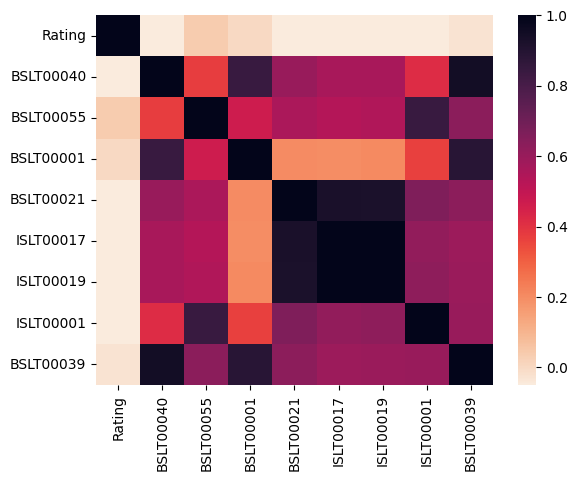

In [313]:
cmap = sns.cm.rocket_r

#Delete multiple columns
dfq = dataNoClead.drop(['Reg_No.', 'Year','1stAltmanZValue','EquityToAssetsRatio','4thAltmanZValue','5thAltmanZValue','AltmanZ','CurrentRatio','NetProfitMargin','ROCE','AccountsPayableTurnovers'], axis=1)

ax = sns.heatmap(dfq.corr(),
                 annot=False,
                 fmt=".3f",
                 vmin=-0.05,
                 cmap = cmap)

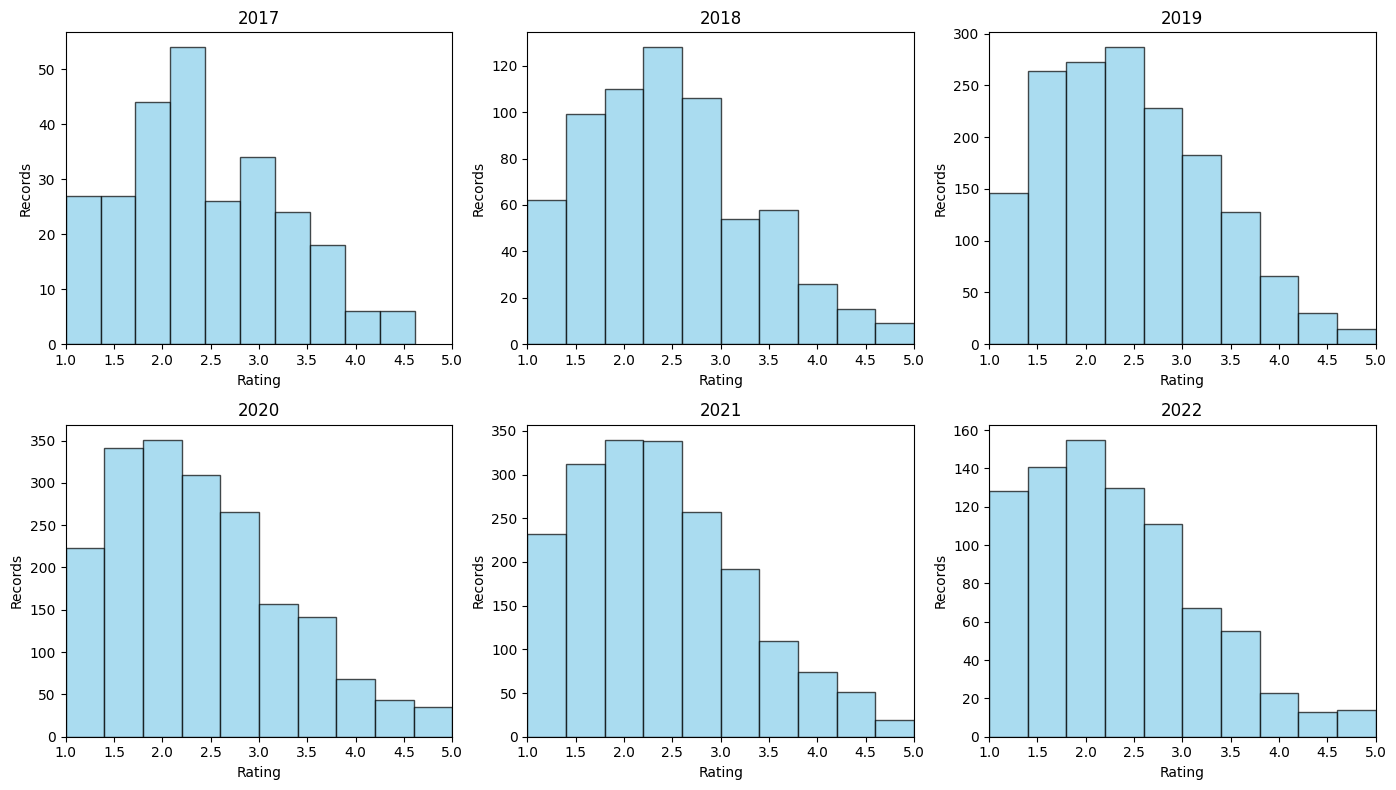

In [314]:
# Group by year and create histograms
unique_years = dataNoClead_sortedByYear['Year'].unique()
num_rows, num_cols = 2, 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 8))

for i, year in enumerate(unique_years):
    row, col = divmod(i, num_cols)
    subset = dataNoClead_sortedByYear[dataNoClead_sortedByYear['Year'] == year]
    axs[row, col].hist(subset['Rating'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    axs[row, col].set_title(f'{year}')
    axs[row, col].set_xlabel('Rating')
    axs[row, col].set_ylabel('Records')
    axs[row, col].set_xlim(1, 5)  # Set x-axis limits


plt.tight_layout()
plt.show()

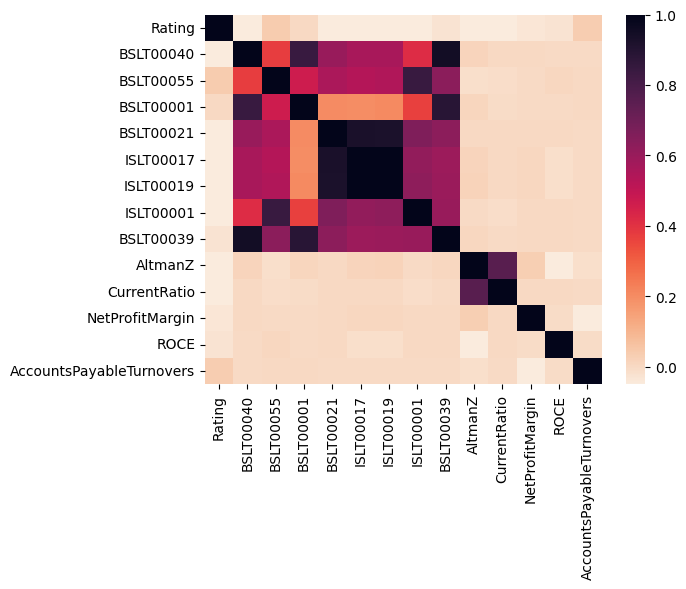

In [315]:
cmap = sns.cm.rocket_r

dataNoClead = dataNoClead.drop(['Reg_No.','1stAltmanZValue','EquityToAssetsRatio','4thAltmanZValue','5thAltmanZValue'], axis=1)

dt = dataNoClead.drop(['Year'], axis=1)

ax = sns.heatmap(dt.corr(),
                 annot=False,
                 fmt=".3f",
                 vmin=-0.05,
                 cmap = cmap)

In [74]:
# #Delete multiple columns
# dataNoCleadDropped = dataNoClead.drop(['Reg_No.', 'Year'], axis=1)

# sns.pairplot(dataNoClead, kind="scatter")
# plt.show()


In [316]:
dataNoClead.info()\



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rating                    7249 non-null   float64
 1   Year                      7249 non-null   int64  
 2   BSLT00040                 7249 non-null   float64
 3   BSLT00055                 7249 non-null   float64
 4   BSLT00001                 7249 non-null   float64
 5   BSLT00021                 7249 non-null   float64
 6   ISLT00017                 7249 non-null   float64
 7   ISLT00019                 7249 non-null   float64
 8   ISLT00001                 7249 non-null   float64
 9   BSLT00039                 7249 non-null   float64
 10  AltmanZ                   7249 non-null   float64
 11  CurrentRatio              7249 non-null   float64
 12  NetProfitMargin           7249 non-null   float64
 13  ROCE                      7249 non-null   float64
 14  Accounts

In [76]:
dataNoClead.describe().apply(lambda x: x.apply('{0:.2f}'.format))


Rating      BSLT00040     BSLT00055      BSLT00001      BSLT00021  \
count  7249.00        7249.00       7249.00        7249.00        7249.00   
mean      2.40     6864658.70    5499252.33     7112600.62     6057933.58   
std       0.86    56026592.47   28861109.65    63546984.24    37445877.02   
min       1.00   -30543000.00        135.00           0.00      -57455.00   
25%       1.72      209564.00     261210.00      100835.00      353564.00   
50%       2.29      854170.00     874707.00      586530.00     1077256.00   
75%       2.95     3320769.00    3130603.00     2938517.00     3493083.00   
max       5.00  2693140000.00  970834000.00  3425988000.00  2071724599.00   

          ISLT00017     ISLT00019      ISLT00001      BSLT00039   AltmanZ  \
count       7249.00       7249.00        7249.00        7249.00   7249.00   
mean     1048341.44     919054.40    17690487.64    13170534.20      4.92   
std     12023903.82   10489072.43    79965703.86    80015249.81     32.16   
min    -40231117.00  -40526373.00           4.00         322.00  -1461.09   
25%         8027.00       6881.00      907572.00      652143.00      2.21   
50%        89083.00      79742.00     2710806.00     2127573.00      3.74   
75%       438120.00     387556.00     8643875.00     7253949.00      5.60   
max    715075461.00  618076247.00  1984944000.00  3477074000.00   1558.44   

      CurrentRatio NetProfitMargin     ROCE AccountsPayableTurnovers  
count      7249.00         7249.00  7249.00                  7249.00  
mean          3.38           -1.91     0.08                  5863.28  
std          35.96          133.26     3.14                361023.23  
min          -3.47       -11131.00   -81.52                     0.15  
25%           0.78            0.01     0.01                    53.06  
50%           1.26            0.03     0.06                    96.57  
75%           2.16            0.09     0.14                   201.86  
max        2427.65          210.73   246.89              30475401.25

In [355]:
# Select columns from the 2nd to the 9th
selected_columns = dataNoClead.iloc[:, 2:9]

# Calculate Z-scores for the selected columns
z_scores = (selected_columns - selected_columns.mean()) / selected_columns.std()

# Define your thresholds
upper_threshold = 0.22
lower_threshold = -0.22

# Create a boolean mask where Z-scores are within the specified range
outlier_mask = ((z_scores < upper_threshold) & (z_scores > lower_threshold)).all(axis=1)

# Remove outliers in the selected columns
data = dataNoClead[outlier_mask]

# Print the info of the cleaned data
#data.info()


# # Select columns from the 2nd to the 8th
# selected_columns = data.iloc[:, 1:13]

# # Calculate Z-scores for the selected columns
# z_scores = np.abs((selected_columns - selected_columns.mean()) / selected_columns.std())
# threshold = 3
# lower_than_threshold = z_scores < threshold
# percentage_lower_than_threshold = lower_than_threshold.mean() * 100


# print("")
# print(percentage_lower_than_threshold)

data.describe().apply(lambda x: x.apply('{0:.2f}'.format))

Rating     Year    BSLT00040    BSLT00055    BSLT00001    BSLT00021  \
count  6069.00  6069.00      6069.00      6069.00      6069.00      6069.00   
mean      2.36  2019.95   1809519.37   1529228.37   1660789.93   1812715.86   
std       0.84     1.28   2788199.88   2040670.80   2852909.90   2275480.27   
min       1.00  2017.00  -5393714.00       157.00         0.00    -57455.00   
25%       1.71  2019.00    202557.00    235885.00     88519.00    335848.00   
50%       2.26  2020.00    696663.00    706336.00    445051.00    911996.00   
75%       2.91  2021.00   2238421.00   1928144.00   1920413.00   2349052.00   
max       5.00  2022.00  19003582.00  11707086.00  21056110.00  14291969.00   

         ISLT00017    ISLT00019    ISLT00001    BSLT00039  AltmanZ  \
count      6069.00      6069.00      6069.00      6069.00  6069.00   
mean     235548.76    207450.43   4861395.50   3473505.80     5.37   
std      509360.38    459787.35   6354579.23   4270479.39    27.24   
min    -1521617.00  -1359507.00     98086.00      2286.00   -81.85   
25%        9807.00      8249.00    886515.00    609090.00     2.38   
50%       77343.00     69251.00   2371453.00   1696878.00     3.83   
75%      292788.00    259695.00   5874529.00   4761983.00     5.71   
max     3692686.00   3151347.00  35155294.00  28954983.00  1558.44   

      CurrentRatio NetProfitMargin     ROCE AccountsPayableTurnovers  
count      6069.00         6069.00  6069.00                  6069.00  
mean          3.43            0.05     0.08                   230.45  
std          38.52            0.38     0.24                   616.21  
min          -3.47           -8.56    -5.94                     0.15  
25%           0.84            0.01     0.01                    50.59  
50%           1.31            0.04     0.06                    90.99  
75%           2.28            0.09     0.14                   182.76  
max        2427.65           19.37     4.15                 15615.59

In [138]:
# #Other cleaning method

# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# theHigherTheMoreDataKeep = 7.3
# data2 = data[~((data < (Q1 - theHigherTheMoreDataKeep * IQR)) | (data > (Q3 + theHigherTheMoreDataKeep * IQR))).any(axis=1)]
# data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5377 entries, 2 to 7248
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rating                    5377 non-null   float64
 1   BSLT00040                 5377 non-null   float64
 2   BSLT00055                 5377 non-null   float64
 3   BSLT00001                 5377 non-null   float64
 4   BSLT00021                 5377 non-null   float64
 5   ISLT00017                 5377 non-null   float64
 6   ISLT00019                 5377 non-null   float64
 7   ISLT00001                 5377 non-null   float64
 8   BSLT00039                 5377 non-null   float64
 9   AltmanZ                   5377 non-null   float64
 10  CurrentRatio              5377 non-null   float64
 11  NetProfitMargin           5377 non-null   float64
 12  ROCE                      5377 non-null   float64
 13  AccountsPayableTurnovers  5377 non-null   float64
dtypes: float64(14

In [356]:
# expert visual evaluation
data = data[data.BSLT00040 > -2600000]
data = data[data.CurrentRatio > -3.46]
data = data[data.CurrentRatio < 24]
data = data[data.AltmanZ > -2]
data = data[data.AltmanZ < 25]
data = data[data.NetProfitMargin < 0.8]
data = data[data.NetProfitMargin > -0.75]
data = data[data.ROCE < 1]
data = data[data.ROCE > -1]
data = data[data.AccountsPayableTurnovers < 3000]
data.describe().apply(lambda x: x.apply('{0:.2f}'.format))

Rating     Year    BSLT00040    BSLT00055    BSLT00001    BSLT00021  \
count  5845.00  5845.00      5845.00      5845.00      5845.00      5845.00   
mean      2.34  2019.95   1798752.24   1518461.97   1622056.54   1831522.46   
std       0.81     1.28   2745472.76   2011991.40   2800113.75   2281014.55   
min       1.00  2017.00  -2283930.00      3236.00         0.00      1696.00   
25%       1.72  2019.00    207108.00    246196.00     88519.00    348507.00   
50%       2.26  2020.00    695979.00    715880.00    433241.00    930296.00   
75%       2.89  2021.00   2199005.00   1903078.00   1869481.00   2384099.00   
max       4.94  2022.00  19003582.00  11707086.00  21056110.00  14291969.00   

         ISLT00017    ISLT00019    ISLT00001    BSLT00039  AltmanZ  \
count      5845.00      5845.00      5845.00      5845.00  5845.00   
mean     238304.63    210019.98   4992484.92   3453579.00     4.36   
std      498140.90    448223.93   6408679.65   4253597.22     3.11   
min    -1398504.00  -1300561.00     98086.00      8723.00    -1.99   
25%       10702.00      9327.00    955825.00    609513.00     2.44   
50%       79855.00     70510.00   2455270.00   1672737.00     3.84   
75%      293029.00    260041.00   6070606.00   4704276.00     5.63   
max     3692686.00   3151347.00  35155294.00  28954983.00    24.97   

      CurrentRatio NetProfitMargin     ROCE AccountsPayableTurnovers  
count      5845.00         5845.00  5845.00                  5845.00  
mean          2.11            0.05     0.09                   181.48  
std           2.60            0.11     0.16                   310.59  
min           0.00           -0.70    -0.99                     4.61  
25%           0.86            0.01     0.01                    51.29  
50%           1.31            0.04     0.06                    90.25  
75%           2.25            0.09     0.14                   174.30  
max          22.88            0.80     0.99                  2980.93

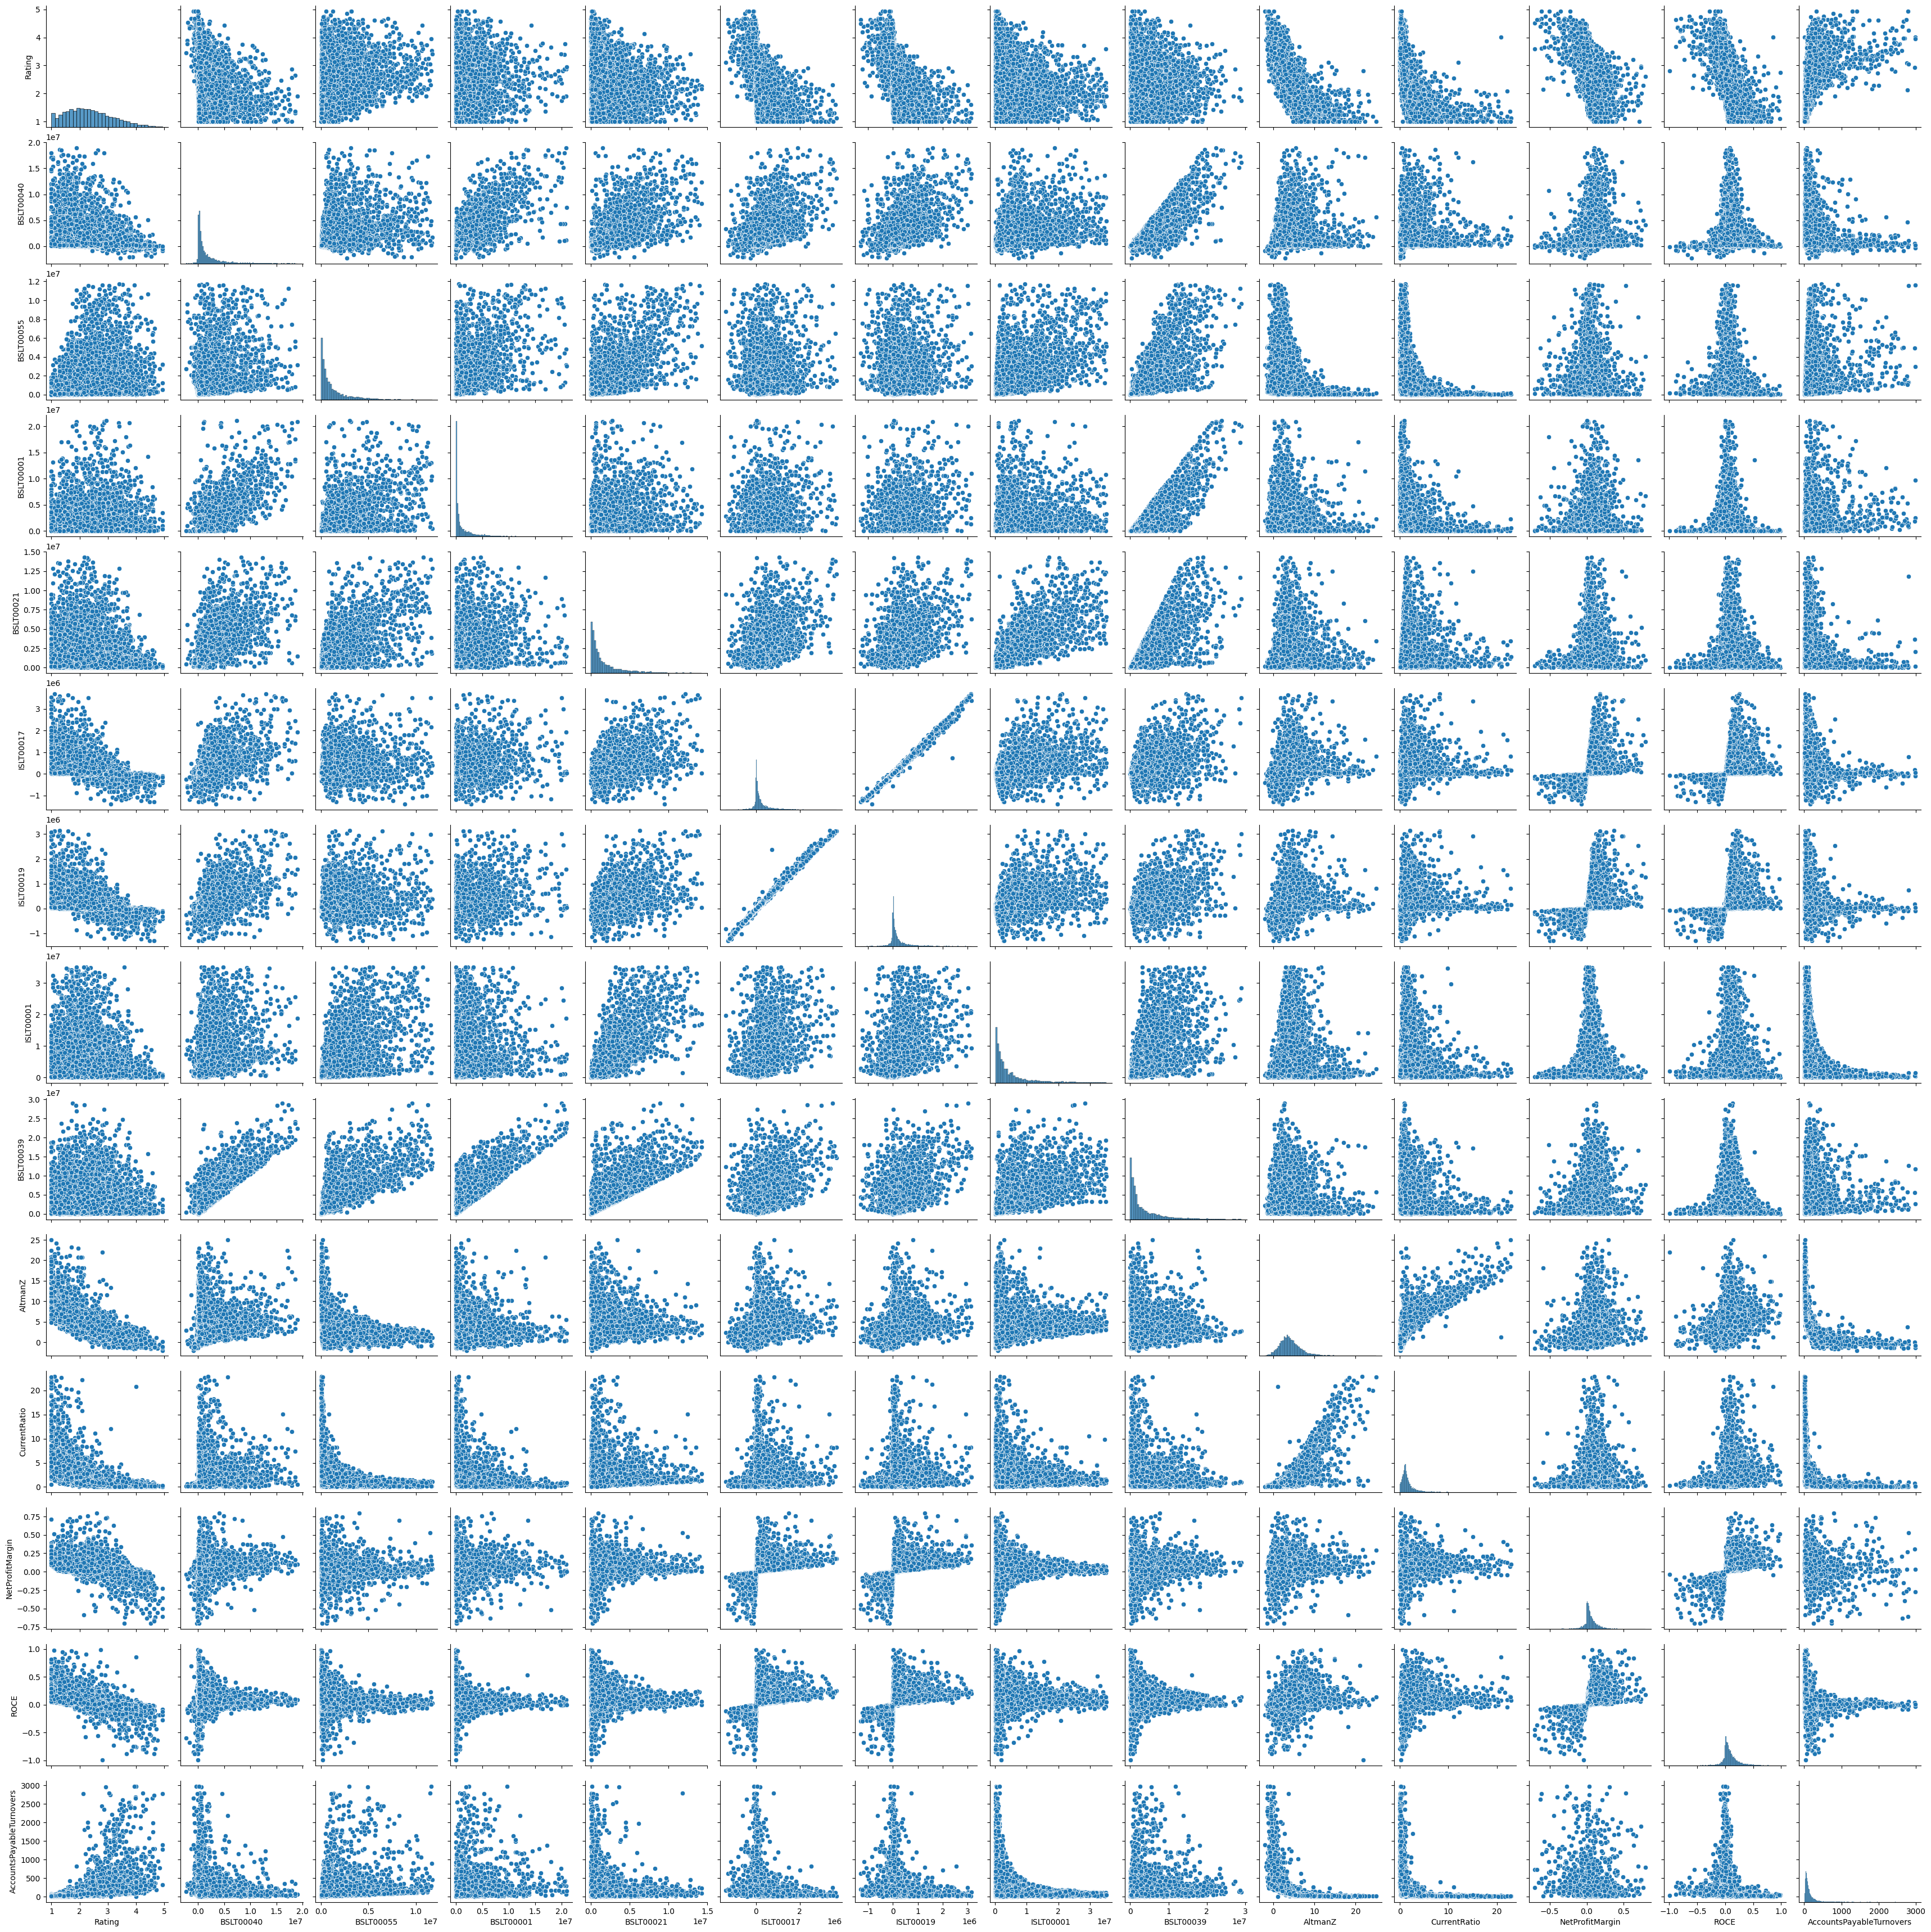

In [321]:
dt = data.drop(['Year'], axis=1)

sns.pairplot(dt, kind="scatter")
plt.show()

# mdpi sablonas.template

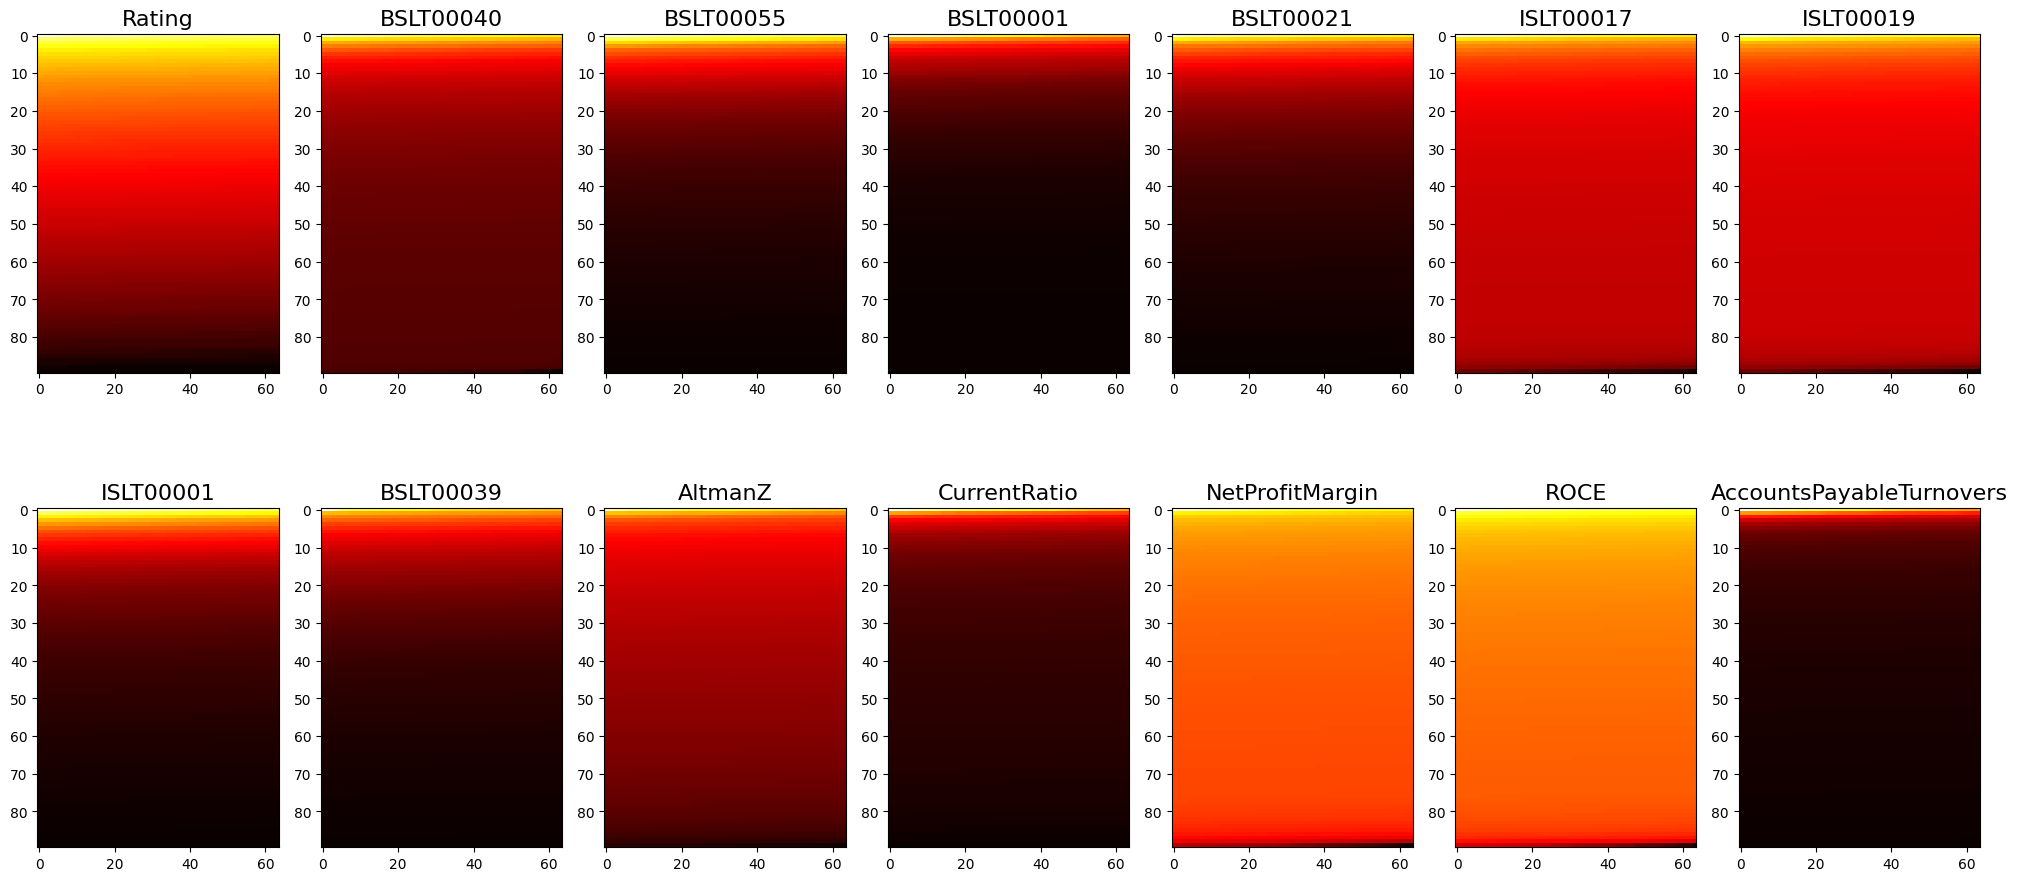

In [322]:
# Example DataFrame


#df = data.sample(n=7128)

df = dt.sample(n=5760)
#Delete multiple columns
#df = df.drop(['Reg_No.', 'Year','1stAltmanZValue','EquityToAssetsRatio','4thAltmanZValue','5thAltmanZValue'], axis=1)


# # Normalize the data to 0-1
# df_normalized = df #(df - df.min()) / (df.max() - df.min())

# df_normalized.head(10)

# Create a subplot for each column
fig, axs = plt.subplots(2, 7, figsize=(20, 10))

for i in range(2):
    for j in range(7):
        # Get the column data
        col_index = i*7 + j

        df = df.sort_values(by=df.columns[col_index], ascending=False)

        #df.reset_index(drop=True, inplace=True)

        data2 = df.iloc[:, col_index]
        
        # Reshape the data to a 2D array
        data_2d = np.reshape(data2.values, (90, 64))
        
        # Create a pixel map using imshow
        im = axs[i, j].imshow(data_2d, cmap='hot', interpolation='nearest')
        
        # Set the title to the column name
        axs[i, j].set_title(df.columns[col_index], fontsize=16)

# Improve layout
plt.tight_layout()
plt.show()




In [80]:
##Other cleaning method

# Q1 = dataNoClead.quantile(0.25)
# Q3 = dataNoClead.quantile(0.75)
# IQR = Q3 - Q1
# theHigherTheMoreDataKeep = 53
# data2 = dataNoClead[~((dataNoClead < (Q1 - theHigherTheMoreDataKeep * IQR)) | (dataNoClead > (Q3 + theHigherTheMoreDataKeep * IQR))).any(axis=1)]
# data2.info()

## Multiple Linear Regression

In [398]:
data

Rating  Year   BSLT00040   BSLT00055   BSLT00001  BSLT00021  ISLT00017  \
2       2.13  2021   1124523.0    112749.0   1130785.0   106487.0    91189.0   
3       2.95  2021      4065.0    147715.0      4364.0   147416.0     1565.0   
4       1.58  2021   8232000.0    999000.0   4998000.0  4220000.0   626000.0   
7       2.93  2021     39663.0    114718.0     17153.0   136567.0    37163.0   
8       2.12  2021  15224628.0    777431.0  13211530.0  2790529.0   215445.0   
...      ...   ...         ...         ...         ...        ...        ...   
7244    2.45  2022   5057725.0   2625899.0   4797912.0  2885133.0   578363.0   
7245    3.25  2022   9055001.0   9031423.0  17271652.0   792177.0  -489377.0   
7246    1.90  2022  12183139.0  11058897.0  14010685.0  9216131.0  2399399.0   
7247    2.15  2022   1346221.0   2360390.0   1075991.0  2787567.0   144612.0   
7248    1.30  2022    168788.0     73141.0     73656.0   168273.0    68877.0   

      ISLT00019   ISLT00001   BSLT00039    AltmanZ  CurrentRatio  \
2       77500.0    285375.0   1237272.0   7.481208      0.944461   
3        1565.0    294520.0    151780.0   1.992083      0.997976   
4      530000.0   3595000.0   9218000.0   7.003702      4.224224   
7       35305.0    207430.0    153720.0   2.088639      1.190458   
8      183128.0   2693058.0  16002059.0  13.401193      3.589423   
...         ...         ...         ...        ...           ...   
7244   557252.0   2292571.0   7683045.0   2.416154      1.098722   
7245  -489377.0   2379871.0  18063829.0   0.887761      0.087713   
7246  2339391.0  15241327.0  23226816.0   1.956326      0.833368   
7247   124638.0  11543711.0   3863558.0   3.950544      1.180977   
7248    65689.0    596888.0    241929.0   5.300441      2.300666   

      NetProfitMargin      ROCE  AccountsPayableTurnovers  
2            0.319541  0.073702                144.208095  
3            0.005314  0.010311                183.063884  
4            0.174131  0.067815                101.428373  
7            0.179159  0.240723                201.861206  
8            0.080000  0.013464                105.368067  
...               ...       ...                       ...  
7244         0.252277  0.075272                418.069118  
7245        -0.205632 -0.027058               1385.146252  
7246         0.157427  0.103235                264.838974  
7247         0.012527  0.039015                 74.633049  
7248         0.115394  0.284699                 44.726088  

[5845 rows x 15 columns]

In [400]:
# Assuming 'df' is your DataFrame
data2 = data.iloc[:, :9]
data2

Rating  Year   BSLT00040   BSLT00055   BSLT00001  BSLT00021  ISLT00017  \
2       2.13  2021   1124523.0    112749.0   1130785.0   106487.0    91189.0   
3       2.95  2021      4065.0    147715.0      4364.0   147416.0     1565.0   
4       1.58  2021   8232000.0    999000.0   4998000.0  4220000.0   626000.0   
7       2.93  2021     39663.0    114718.0     17153.0   136567.0    37163.0   
8       2.12  2021  15224628.0    777431.0  13211530.0  2790529.0   215445.0   
...      ...   ...         ...         ...         ...        ...        ...   
7244    2.45  2022   5057725.0   2625899.0   4797912.0  2885133.0   578363.0   
7245    3.25  2022   9055001.0   9031423.0  17271652.0   792177.0  -489377.0   
7246    1.90  2022  12183139.0  11058897.0  14010685.0  9216131.0  2399399.0   
7247    2.15  2022   1346221.0   2360390.0   1075991.0  2787567.0   144612.0   
7248    1.30  2022    168788.0     73141.0     73656.0   168273.0    68877.0   

      ISLT00019   ISLT00001  
2       77500.0    285375.0  
3        1565.0    294520.0  
4      530000.0   3595000.0  
7       35305.0    207430.0  
8      183128.0   2693058.0  
...         ...         ...  
7244   557252.0   2292571.0  
7245  -489377.0   2379871.0  
7246  2339391.0  15241327.0  
7247   124638.0  11543711.0  
7248    65689.0    596888.0  

[5845 rows x 9 columns]

In [413]:
data2

Rating  Year   BSLT00040   BSLT00055   BSLT00001  BSLT00021  ISLT00017  \
2       2.13  2021   1124523.0    112749.0   1130785.0   106487.0    91189.0   
3       2.95  2021      4065.0    147715.0      4364.0   147416.0     1565.0   
4       1.58  2021   8232000.0    999000.0   4998000.0  4220000.0   626000.0   
7       2.93  2021     39663.0    114718.0     17153.0   136567.0    37163.0   
8       2.12  2021  15224628.0    777431.0  13211530.0  2790529.0   215445.0   
...      ...   ...         ...         ...         ...        ...        ...   
7244    2.45  2022   5057725.0   2625899.0   4797912.0  2885133.0   578363.0   
7245    3.25  2022   9055001.0   9031423.0  17271652.0   792177.0  -489377.0   
7246    1.90  2022  12183139.0  11058897.0  14010685.0  9216131.0  2399399.0   
7247    2.15  2022   1346221.0   2360390.0   1075991.0  2787567.0   144612.0   
7248    1.30  2022    168788.0     73141.0     73656.0   168273.0    68877.0   

      ISLT00019   ISLT00001  
2       77500.0    285375.0  
3        1565.0    294520.0  
4      530000.0   3595000.0  
7       35305.0    207430.0  
8      183128.0   2693058.0  
...         ...         ...  
7244   557252.0   2292571.0  
7245  -489377.0   2379871.0  
7246  2339391.0  15241327.0  
7247   124638.0  11543711.0  
7248    65689.0    596888.0  

[5845 rows x 9 columns]

In [412]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

fdpop = data2

# Assuming 'housing_dataset' is your DataFrame and 'price' is the target variable
# 'features' is a list of predictor variables
features = list(fdpop.columns)
features.remove('Rating')  # remove the target variable from the features list
features.remove('Year')

# Define the target variable
y_train = fdpop['Rating']

# Iteratively remove features with the highest p-value
while len(features) > 0:
    # Add a constant to the predictor variables
    X_train = sm.add_constant(fdpop[features])

    # Train the model
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    # Get the p-values for the features
    p_values = results.pvalues.drop('const')  # drop the p-value of the constant

    # If the maximum p-value is greater than 0.05, remove that feature
    if max(p_values) > 0.05:
        remove_feature = p_values.idxmax()
        features.remove(remove_feature)
    else:
        break

# Print the final model summary
X_train_lm = sm.add_constant(fdpop[features])
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     804.9
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        04:21:21   Log-Likelihood:                -5529.1
No. Observations:                5845   AIC:                         1.107e+04
Df Residuals:                    5839   BIC:                         1.111e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3732      0.011    217.620      0.0

In [407]:
dataset = "randomAll"

if dataset == "2022all":
    df = data
    mask = df['Year'] == 2022

    # Separate data into two subsets based on the mask
    X_train = df.loc[~mask].iloc[:, 2:].values
    y_train = df.loc[~mask].iloc[:, 0].values

    X_test = df.loc[mask].iloc[:, 2:].values
    y_test = df.loc[mask].iloc[:, 0].values

    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)


elif dataset == "randomAll":
    df = data

    X = df.iloc[:, 2:].values  # Input features from 2nd column to the end
    y = df.iloc[:, 0].values   # Output is the first column

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

elif dataset == "20227":
    df = data2
    mask = df['Year'] == 2022

    # Separate data into two subsets based on the mask
    X_train = df.loc[~mask].iloc[:, 2:].values
    y_train = df.loc[~mask].iloc[:, 0].values

    X_test = df.loc[mask].iloc[:, 2:].values
    y_test = df.loc[mask].iloc[:, 0].values

    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

elif dataset == "random7":
    df = data2

    X = df.iloc[:, 2:].values  # Input features from 2nd column to the end
    y = df.iloc[:, 0].values   # Output is the first column

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

In [408]:
# Assuming 'coefficients' is a list of your coefficients and 'features' is your feature data
coefficientsAll = [-5.799e-08, 4.229e-08,2.455e-08,-1.249e-08, 2.408e-07, -3.927e-07,-1.04e-08,1.235e-08,-0.1143,0.0079 ,-1.0198, -1.5927,0.0003 ]  # replace with your actual coefficients if necessary
interceptAll =   3.0168  # replace with your actual intercept if necessary

# Calculate the dot product of the coefficients and the features, and add the intercept
y_pred = np.dot(pd.DataFrame(X_test), coefficientsAll) + interceptAll


In [ ]:
# Assuming 'coefficients' is a list of your coefficients and 'features' is your feature data
coefficients7 = [ ]  # replace with your actual coefficients if necessary
intercept7 =   3.0168  # replace with your actual intercept if necessary

# Calculate the dot product of the coefficients and the features, and add the intercept
y_pred = np.dot(pd.DataFrame(X_test), coefficients7) + intercept7


In [409]:
# # Make predictions on the test data
# y_pred = model.predict(X_test)

# Assuming y_pred contains NaN values
nan_count_y_pred = np.isnan(y_pred).sum()

record_count = len(y_pred)

nanPercent = (nan_count_y_pred/record_count) * 100
results = []

if nanPercent == 100:  
    # Metrics
    mse = 0
    mae = 0
    r2 = 0
    rmse = 0

elif nanPercent > 0:
    # Replace NaN values in y_pred with a suitable value (mean)
    imputer = SimpleImputer(strategy='mean')
    y_pred_imputed = imputer.fit_transform(y_pred.reshape(-1, 1))
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred_imputed)
    mae = mean_absolute_error(y_test, y_pred_imputed)
    r2 = r2_score(y_test, y_pred_imputed)
    rmse = sqrt(mse)
    
else:
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mse)

#results.append({'dataset': dataset,'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer, 'activation': activation, 'mse': mse, 'mae': mae, 'r2': r2, 'rmse': rmse, 'predNAN': nanPercent})
#rez.append({'dataset': dataset,'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer, 'activation': activation, 'mse': mse, 'mae': mae, 'r2': r2, 'rmse': rmse, 'predNAN': nanPercent})
results.append({'dataset': dataset,'mse': mse, 'mae': mae, 'r2': r2, 'rmse': rmse})
# Convert results to DataFrame
rez_df = pd.DataFrame(results)

rez_df

dataset       mse       mae        r2      rmse
0  randomAll  0.177605  0.332058  0.743819  0.421432

In [ ]:
# Assuming 'df' is your DataFrame
data2 = data.iloc[:, :9]
data2

Rating  Year   BSLT00040   BSLT00055   BSLT00001  BSLT00021  ISLT00017  \
2       2.13  2021   1124523.0    112749.0   1130785.0   106487.0    91189.0   
3       2.95  2021      4065.0    147715.0      4364.0   147416.0     1565.0   
4       1.58  2021   8232000.0    999000.0   4998000.0  4220000.0   626000.0   
7       2.93  2021     39663.0    114718.0     17153.0   136567.0    37163.0   
8       2.12  2021  15224628.0    777431.0  13211530.0  2790529.0   215445.0   
...      ...   ...         ...         ...         ...        ...        ...   
7244    2.45  2022   5057725.0   2625899.0   4797912.0  2885133.0   578363.0   
7245    3.25  2022   9055001.0   9031423.0  17271652.0   792177.0  -489377.0   
7246    1.90  2022  12183139.0  11058897.0  14010685.0  9216131.0  2399399.0   
7247    2.15  2022   1346221.0   2360390.0   1075991.0  2787567.0   144612.0   
7248    1.30  2022    168788.0     73141.0     73656.0   168273.0    68877.0   

      ISLT00019   ISLT00001  
2       77500.0    285375.0  
3        1565.0    294520.0  
4      530000.0   3595000.0  
7       35305.0    207430.0  
8      183128.0   2693058.0  
...         ...         ...  
7244   557252.0   2292571.0  
7245  -489377.0   2379871.0  
7246  2339391.0  15241327.0  
7247   124638.0  11543711.0  
7248    65689.0    596888.0  

[5845 rows x 9 columns]

In [382]:
# Define the grid search parameters
param_grid = {'batch_size': [10, 20, 40],#10, 20, 40, 
              'epochs': [20, 50, 80, 120, 160, 210, 250],
              'optimizer': ["sgd_001","sgd_0001", "adam_001", "adam_0001","sgd_005","sgd_01", "adam_005", "adam_01"],
              'activation': ['relu', 'tanh', 'sigmoid'],
              'datasets':["2022all","random7","20227","randomAll"]}#
# Initialize results list
results = []
for dataset in param_grid['datasets']:
    if dataset == "2022all":
        df = data
        mask = df['Year'] == 2022

        # Separate data into two subsets based on the mask
        X_train = df.loc[~mask].iloc[:, 2:].values
        y_train = df.loc[~mask].iloc[:, 0].values

        X_test = df.loc[mask].iloc[:, 2:].values
        y_test = df.loc[mask].iloc[:, 0].values

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)


    elif dataset == "randomAll":
        df = data

        X = df.iloc[:, 2:].values  # Input features from 2nd column to the end
        y = df.iloc[:, 0].values   # Output is the first column

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    elif dataset == "20227":
        df = data2
        mask = df['Year'] == 2022

        # Separate data into two subsets based on the mask
        X_train = df.loc[~mask].iloc[:, 2:].values
        y_train = df.loc[~mask].iloc[:, 0].values

        X_test = df.loc[mask].iloc[:, 2:].values
        y_test = df.loc[mask].iloc[:, 0].values

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    elif dataset == "random7":
        df = data2

        X = df.iloc[:, 2:].values  # Input features from 2nd column to the end
        y = df.iloc[:, 0].values   # Output is the first column

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        
    # Create and fit a multiple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Assuming y_pred contains NaN values
    nan_count_y_pred = np.isnan(y_pred).sum()

    record_count = len(y_pred)

    nanPercent = (nan_count_y_pred/record_count) * 100

    if nanPercent == 100:  
        # Metrics
        mse = 0
        mae = 0
        r2 = 0
        rmse = 0

    elif nanPercent > 0:
        # Replace NaN values in y_pred with a suitable value (mean)
        imputer = SimpleImputer(strategy='mean')
        y_pred_imputed = imputer.fit_transform(y_pred.reshape(-1, 1))
        
        # Metrics
        mse = mean_squared_error(y_test, y_pred_imputed)
        mae = mean_absolute_error(y_test, y_pred_imputed)
        r2 = r2_score(y_test, y_pred_imputed)
        rmse = sqrt(mse)
        
    else:
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = sqrt(mse)

    #results.append({'dataset': dataset,'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer, 'activation': activation, 'mse': mse, 'mae': mae, 'r2': r2, 'rmse': rmse, 'predNAN': nanPercent})
    #rez.append({'dataset': dataset,'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer, 'activation': activation, 'mse': mse, 'mae': mae, 'r2': r2, 'rmse': rmse, 'predNAN': nanPercent})
    results.append({'dataset': dataset,'mse': mse, 'mae': mae, 'r2': r2, 'rmse': rmse,'Coefficients': model.coef_,"Intercept": model.intercept_})
    # Convert results to DataFrame
    rez_df = pd.DataFrame(results)

rez_df

# Save the results to a CSV file
with open('LinearRegressionResults.csv', 'a') as f:
    rez_df.to_csv(f, header=f.tell()==0, index=False)




ValueError: shapes (635,13) and (14,) not aligned: 13 (dim 1) != 14 (dim 0)

In [83]:
# # Create a scatter plot with the linear regression line

# # Clip the predicted values to be within the range [1, 5]
# # y_pred_clipped = np.clip(y_pred, 1, 5)
# plt.scatter(X_test['mok_sumos_ir_isipareigojimai'], y_test, label='Data', color='blue')  # You can choose any X variable for the x-axis
# plt.plot(X_test['mok_sumos_ir_isipareigojimai'], y_pred, label='Linear Regression', color='red')  # Same X variable for the x-axis
# plt.xlabel('mok_sumos_ir_isipareigojimai')  # Update the label to match the chosen X variable
# plt.ylabel('Annual Rating Value')
# plt.legend()
# plt.title('Linear Regression Example')
# plt.show()

In [84]:
# # Test the model on a single set of input variables
# new_input_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])  # Replace these values with your input data
# predicted_y8 = model.predict(new_input_data)  # Predict Y8 based on the input data

# print("Predicted Y8 for the new input data:")
# print(predicted_y8[0])  # Print the single predicted value

In [85]:
# # Test the model on a single set of input variables
# new_input_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])  # Replace these values with your input data
# predicted_y8 = model.predict(new_input_data)  # Predict Y8 based on the input data

# print("Predicted Y8 for the new input data:")
# print(predicted_y8[0])  # Print the single predicted value

## Polynomial Linear Regression

In [334]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data[['nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas', 'trumpalaikis_turtas', 'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos']], data['Annual Rating Value'], test_size=0.2, random_state=42)

# # Create Polynomial Features
# poly = PolynomialFeatures(degree=2)  # You can choose the degree you want
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# # Create and fit a Polynomial Linear Regression model
# model = LinearRegression()
# model.fit(X_train_poly, y_train)

# # Make predictions on the test data
# y_pred = model.predict(X_test_poly)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

In [87]:
# # Create a scatter plot with the linear regression line
# # Clip the predicted values to be within the range [1, 5]
# y_pred_clipped = np.clip(y_pred, 1, 5)
# plt.scatter(X_test['pardavimo_pajamos'], y_test, label='Data', color='blue')  # You can choose any X variable for the x-axis
# plt.plot(X_test['pardavimo_pajamos'], y_pred_clipped, label='Linear Regression', color='red')  # Same X variable for the x-axis
# plt.xlabel('pardavimo_pajamos')  # Update the label to match the chosen X variable
# plt.ylabel('Annual Rating Value')
# plt.legend()
# plt.title('Linear Regression Example')
# plt.show()

In [88]:
# # Test the model on new data
# new_input_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])  # Replace these values with your input data
# new_input_data_poly = poly.transform(new_input_data)  # Transform the input data to include polynomial features
# predicted_y8 = model.predict(new_input_data_poly)  # Predict Y8 based on the input data

# # Clip the predicted value to be within the range [1, 5]
# predicted_y8_clipped = np.clip(predicted_y8, 1, 5)

# print("Predicted Y8 for the new input data (clipped):")
# print(predicted_y8_clipped[0])  # Print the single predicted value (clipped to [1, 5])

In [89]:
# # Test the model on new data
# new_input_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])  # Replace these values with your input data
# new_input_data_poly = poly.transform(new_input_data)  # Transform the input data to include polynomial features
# predicted_y8 = model.predict(new_input_data_poly)  # Predict Y8 based on the input data

# # Clip the predicted value to be within the range [1, 5]
# predicted_y8_clipped = np.clip(predicted_y8, 1, 5)

# print("Predicted Y8 for the new input data (clipped):")
# print(predicted_y8_clipped[0])  # Print the single predicted value (clipped to [1, 5])

## Multi-Layer Perceptron (MLP)

In [90]:
# # Dataset 
# df = data

# # Dataset
# X = df.iloc[:, 1:].values  # Input features from 2nd column to the end
# y = df.iloc[:, 0].values   # Output is the first column

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # define the grid search parameters
# param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (10,), (20,20), (10,10)],
#               'activation': ['tanh', 'relu', 'logistic', 'identity'],
#               'solver': ['sgd', 'adam', 'lbfgs'],
#               'alpha': [0.0001, 0.05, 0.01, 0.001, 0.1, 0.3, 0.5],
#               'learning_rate': ['constant', 'adaptive', 'invscaling']}

# mlp = MLPRegressor(max_iter=200)

# mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# grid = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3, scoring=mse_scorer, error_score='raise')
# grid_result = grid.fit(X_train, y_train)

# # Create a DataFrame from the grid search results
# results_df = pd.DataFrame(grid_result.cv_results_)

# # Calculate metrics for each parameter combination
# for i, params in enumerate(results_df['params']):
#     mlp.set_params(**params)
#     mlp.fit(X_train, y_train)
#     y_pred = mlp.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     rmse = sqrt(mse)
#     results_df.loc[i, 'mse'] = mse
#     results_df.loc[i, 'mae'] = mae
#     results_df.loc[i, 'r2'] = r2
#     results_df.loc[i, 'rmse'] = rmse

# # Save the results to a CSV file
# results_df.to_csv('MLP_grid_search_results.csv', index=False)


In [91]:
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

## Artificial Neural Network (ANN)

In [94]:
# Assuming 'df' is your DataFrame
data2 = data.iloc[:, :10]
data2

Rating    Reg_No.  Year   BSLT00040   BSLT00055   BSLT00001  BSLT00021  \
1       3.14  305894308  2021   1961073.0     58067.0   1353537.0  2315774.0   
2       2.13  305835320  2021   1124523.0    112749.0   1130785.0   106487.0   
3       2.95  305802181  2021      4065.0    147715.0      4364.0   147416.0   
4       1.58  305790957  2021   8232000.0    999000.0   4998000.0  4220000.0   
7       2.93  305714361  2021     39663.0    114718.0     17153.0   136567.0   
...      ...        ...   ...         ...         ...         ...        ...   
7244    2.45  110378330  2022   5057725.0   2625899.0   4797912.0  2885133.0   
7245    3.25  110302215  2022   9055001.0   9031423.0  17271652.0   792177.0   
7246    1.90  110080729  2022  12183139.0  11058897.0  14010685.0  9216131.0   
7247    2.15  110022220  2022   1346221.0   2360390.0   1075991.0  2787567.0   
7248    1.30  110019434  2022    168788.0     73141.0     73656.0   168273.0   

      ISLT00017  ISLT00019   ISLT00001  
1       75340.0    61073.0    165228.0  
2       91189.0    77500.0    285375.0  
3        1565.0     1565.0    294520.0  
4      626000.0   530000.0   3595000.0  
7       37163.0    35305.0    207430.0  
...         ...        ...         ...  
7244   578363.0   557252.0   2292571.0  
7245  -489377.0  -489377.0   2379871.0  
7246  2399399.0  2339391.0  15241327.0  
7247   144612.0   124638.0  11543711.0  
7248    68877.0    65689.0    596888.0  

[6069 rows x 10 columns]

In [375]:
# ~3,5 val

# # Define custom optimizers
sgd_001 = keras.optimizers.legacy.SGD(learning_rate=0.01)
sgd_0001 = keras.optimizers.legacy.SGD(learning_rate=0.001)
adam_001 = keras.optimizers.legacy.Adam(learning_rate=0.01)
adam_0001 = keras.optimizers.legacy.Adam(learning_rate=0.001)
sgd_005 = keras.optimizers.legacy.SGD(learning_rate=0.05)
sgd_01 = keras.optimizers.legacy.SGD(learning_rate=0.1)
adam_005 = keras.optimizers.legacy.Adam(learning_rate=0.05)
adam_01 = keras.optimizers.legacy.Adam(learning_rate=0.1)

# # Define the grid search parameters
# param_grid = {'batch_size': [10, 20, 40, 60, 80, 100, 140, 220],
#               'epochs': [20, 50, 80, 120],
#               'optimizer': ["sgd_001","sgd_0001", "adam_001", "adam_0001","sgd_005","sgd_01", "adam_005", "adam_01"],
#               'activation': ['relu', 'tanh', 'sigmoid'],
#               'datasets':["2022","random"]}

# # Define the grid search parameters
# param_grid = {'batch_size': [10, 20, 40, 60, 80, 100, 140, 220],
#               'epochs': [160, 210, 250],
#               'optimizer': ["sgd_001","sgd_0001", "adam_001", "adam_0001","sgd_005","sgd_01", "adam_005", "adam_01"],
#               'activation': ['relu', 'tanh', 'sigmoid'],
#               'datasets':["2022all","random7","20227","randomAll"]}

# Define the grid search parameters
param_grid = {'batch_size': [10, 20, 40],#10, 20, 40, 
              'epochs': [20, 50, 80, 120, 160, 210, 250],
              'optimizer': ["sgd_001","sgd_0001", "adam_001", "adam_0001","sgd_005","sgd_01", "adam_005", "adam_01"],
              'activation': ['relu', 'tanh', 'sigmoid'],
              'datasets':["randomAll6000"]}#"2022all6000","random76000",202276000

# Initialize results list
results = []
for dataset in param_grid['datasets']:
    if dataset == "2022all6000":
        df = data
        mask = df['Year'] == 2022

        # Separate data into two subsets based on the mask
        X_train = df.loc[~mask].iloc[:, 3:].values
        y_train = df.loc[~mask].iloc[:, 0].values

        X_test = df.loc[mask].iloc[:, 3:].values
        y_test = df.loc[mask].iloc[:, 0].values

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)


    elif dataset == "randomAll6000":
        df = data

        X = df.iloc[:, 3:].values  # Input features from 2nd column to the end
        y = df.iloc[:, 0].values   # Output is the first column

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    elif dataset == "202276000":
        df = data2
        mask = df['Year'] == 2022

        # Separate data into two subsets based on the mask
        X_train = df.loc[~mask].iloc[:, 3:].values
        y_train = df.loc[~mask].iloc[:, 0].values

        X_test = df.loc[mask].iloc[:, 3:].values
        y_test = df.loc[mask].iloc[:, 0].values

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    elif dataset == "random76000":
        df = data2

        X = df.iloc[:, 3:].values  # Input features from 2nd column to the end
        y = df.iloc[:, 0].values   # Output is the first column

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    for batch_size in param_grid['batch_size']:
        for epochs in param_grid['epochs']:
            for optimizer in param_grid['optimizer']:
                for activation in param_grid['activation']:
                    if optimizer == 'sgd_001':
                        opt = sgd_001
                    elif optimizer == 'sgd_0001':
                        opt = sgd_0001
                    elif optimizer == 'adam_001':
                        opt = adam_001
                    elif optimizer == 'adam_0001':
                        opt = adam_0001
                    elif optimizer == 'sgd_005':
                        opt = sgd_005
                    elif optimizer == 'sgd_01':
                        opt = sgd_01
                    elif optimizer == 'adam_005':
                        opt = adam_005
                    elif optimizer == 'adam_01':
                        opt = adam_01
                    model = Sequential()
                    model.add(Dense(units=64, activation=activation, input_dim=len(X_train[0])))
                    model.add(Dense(units=32, activation=activation))
                    model.add(Dense(units=1, activation='linear'))  # Assuming rating is a continuous value
                    model.compile(optimizer=opt, loss='mean_squared_error')
                    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                    
                    # Predicting the Test set results
                    y_pred = model.predict(X_test)

                    # Assuming y_pred contains NaN values
                    nan_count_y_pred = np.isnan(y_pred).sum()

                    record_count = len(y_pred)

                    nanPercent = (nan_count_y_pred/record_count) * 100

                    if nanPercent == 100:  
                        # Metrics
                        mse = 0
                        mae = 0
                        r2 = 0
                        rmse = 0

                    elif nanPercent > 0:
                        # Replace NaN values in y_pred with a suitable value (e.g., mean)
                        imputer = SimpleImputer(strategy='mean')
                        y_pred_imputed = imputer.fit_transform(y_pred.reshape(-1, 1))
                        
                        # Metrics
                        mse = mean_squared_error(y_test, y_pred_imputed)
                        mae = mean_absolute_error(y_test, y_pred_imputed)
                        r2 = r2_score(y_test, y_pred_imputed)
                        rmse = sqrt(mse)
                        
                    else:
                        mse = mean_squared_error(y_test, y_pred)
                        mae = mean_absolute_error(y_test, y_pred)
                        r2 = r2_score(y_test, y_pred)
                        rmse = sqrt(mse)
                    
                    rez = []
                    results.append({'dataset': dataset,'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer, 'activation': activation, 'mse': mse, 'mae': mae, 'r2': r2, 'rmse': rmse, 'predNAN': nanPercent})
                    rez.append({'dataset': dataset,'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer, 'activation': activation, 'mse': mse, 'mae': mae, 'r2': r2, 'rmse': rmse, 'predNAN': nanPercent})
                    # Convert results to DataFrame
                    rez_df = pd.DataFrame(rez)

                    # Save the results to a CSV file
                    with open('ANN_manual_grid_search_results.csv', 'a') as f:
                        rez_df.to_csv(f, header=f.tell()==0, index=False)


# # Convert results to DataFrame
# results_df = pd.DataFrame(results)

# # Save the results to a CSV file
# with open('ANN_manual_grid_search_results.csv', 'a') as f:
#     results_df.to_csv(f, header=f.tell()==0, index=False)



KeyboardInterrupt: 

In [92]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
with open('ANN_manual_grid_search_results.csv', 'a') as f:
    results_df.to_csv(f, header=f.tell()==0, index=False)

In [118]:
# # Replace 'your_dataset.csv' with the actual name of your dataset
# df = data

# # Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
# X = df.iloc[:, 1:].values  # Input features from 2nd column to the end
# y = df.iloc[:, 0].values   # Output is the first column

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# model = Sequential()

# # Adjust the number of units and activation function as needed
# model.add(Dense(units=64, activation='relu', input_dim=17))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1, activation='linear'))  # Assuming rating is a continuous value

# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# loss = model.evaluate(X_test, y_test)
# print(f'Mean Squared Error on Test Set: {loss}')

Epoch 1/50
76/76 [==============================] - 1s 3ms/step - loss: 1.3527 - val_loss: 0.2763
Epoch 2/50
76/76 [==============================] - 0s 1ms/step - loss: 0.2036 - val_loss: 0.1552
Epoch 3/50
76/76 [==============================] - 0s 1ms/step - loss: 0.1169 - val_loss: 0.1089
Epoch 4/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0886 - val_loss: 0.0940
Epoch 5/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0789 - val_loss: 0.0875
Epoch 6/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0754 - val_loss: 0.0842
Epoch 7/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0714 - val_loss: 0.0833
Epoch 8/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0699 - val_loss: 0.0812
Epoch 9/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0686 - val_loss: 0.0798
Epoch 10/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0664 - val_loss: 0.0794
Epoch 11/50
76/76 [

In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Make predictions on the new data
# predicted_rating = model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Make predictions on the new data
# predicted_rating = model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

## Random Forest 


In [ ]:
# # Dataset 
# df = data

# # Dataset
# X = df.iloc[:, 1:].values  # Input features from 2nd column to the end
# y = df.iloc[:, 0].values   # Output is the first column

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize input features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Build Random Forest model
# rf_model = RandomForestRegressor(random_state=42)

# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': [100, 200, 300, 500, 750, 1000],
#     'max_depth': [None, 5, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 20, 35],
#     'min_samples_leaf': [1, 2, 4, 8]
# }

# # Define the metrics for evaluating models
# scoring = {
#     'mse': make_scorer(mean_squared_error, greater_is_better=False),
#     'mae': make_scorer(mean_absolute_error, greater_is_better=False),
#     'r2': make_scorer(r2_score),
#     'rmse': make_scorer(lambda y_true, y_pred: sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
# }

# # Set up the grid search
# grid_search = GridSearchCV(
#     estimator=rf_model,
#     param_grid=hyperparameter_grid,
#     cv=3,
#     scoring=scoring,
#     refit='mse',
#     verbose=1,
#     n_jobs=-1,
#     return_train_score=True
# )

# # Conduct the grid search
# grid_search.fit(X_train, y_train)

# # Get the results of the grid search
# results = grid_search.cv_results_

# # Create a DataFrame to store the results
# results_df = pd.DataFrame(results)

# # Save the results to a CSV file
# results_df.to_csv('grid_search_results.csv', index=False)

# # Print the results for each combination of parameters
# for i in range(len(results['params'])):
#     print(f"Parameters: {results['params'][i]}")
#     print(f"MSE: {-results['mean_test_mse'][i]}")
#     print(f"MAE: {-results['mean_test_mae'][i]}")
#     print(f"R2: {results['mean_test_r2'][i]}")
#     print(f"RMSE: {-results['mean_test_rmse'][i]}")
#     print()


Fitting 3 folds for each of 600 candidates, totalling 1800 fits
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 0.06294289335830211
MAE: 0.19345925925925925
R2: 0.8732852419650148
RMSE: 0.2508419654043766

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MSE: 0.06250798822617559
MAE: 0.19249648356221385
R2: 0.8741657816151104
RMSE: 0.24997264073119138

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
MSE: 0.06239470744855968
MAE: 0.19228368705784438
R2: 0.8743938172475866
RMSE: 0.2497490880944622

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
MSE: 0.062143666388181494
MAE: 0.1918940074906367
R2: 0.8748992838851354
RMSE: 0.24924046894064253

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 750}
MSE: 0.06210640288232302
MAE: 0.191905

In [ ]:
# # Get the best parameters
# best_parameters = grid_search.best_params_

# # Train the Random Forest model with the best parameters
# rf_model_best = RandomForestRegressor(**best_parameters, random_state=42)
# rf_model_best.fit(X_train, y_train)

# # Make predictions on test set
# y_pred = rf_model_best.predict(X_test)

# # Evaluate model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# rmse = sqrt(mse)

# print(f'Best Parameters: {best_parameters}')
# print(f'Mean Squared Error on Test Set: {mse}')
# print(f'Mean Absolute Error on Test Set: {mae}')
# print(f'R-squared on Test Set: {r2}')
# print(f'Root Mean Squared Error on Test Set: {rmse}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 750}
Mean Squared Error on Test Set: 0.07021875119256114
Mean Absolute Error on Test Set: 0.2064064412768981
R-squared on Test Set: 0.8553799132277975
Root Mean Squared Error on Test Set: 0.2649882095349926


In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Make predictions on the new data
# predicted_rating = rf_model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0]}')

Predicted Rating for the New Data: 3.7438999999999965


In [ ]:

# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Make predictions on the new data
# predicted_rating = rf_model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0]}')

Predicted Rating for the New Data: 1.7041


## Long Short-Term Memory (LSTM) 

In [ ]:
# # Assuming you have a dataset with 8 columns and named 'your_dataset.csv'
# df = data

# # Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
# X = df.iloc[:, :7].values  # Input features
# y = df.iloc[:, 7].values   # Output (rating)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the input features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Reshape the input data for LSTM (assuming a time series sequence)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(units=64, activation='relu', input_shape=(1, 7)))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1, activation='linear'))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# # Evaluate the model on the test set
# loss = model.evaluate(X_test, y_test)
# print(f'Mean Squared Error on Test Set: {loss}')

Epoch 1/50
95/95 [==============================] - 1s 4ms/step - loss: 3.7013 - val_loss: 0.9867
Epoch 2/50
95/95 [==============================] - 0s 2ms/step - loss: 1.2306 - val_loss: 0.6488
Epoch 3/50
95/95 [==============================] - 0s 2ms/step - loss: 0.7516 - val_loss: 0.5670
Epoch 4/50
95/95 [==============================] - 0s 2ms/step - loss: 0.5786 - val_loss: 0.4906
Epoch 5/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4846 - val_loss: 0.4414
Epoch 6/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4159 - val_loss: 0.4007
Epoch 7/50
95/95 [==============================] - 0s 2ms/step - loss: 0.3689 - val_loss: 0.3772
Epoch 8/50
95/95 [==============================] - 0s 2ms/step - loss: 0.3347 - val_loss: 0.3445
Epoch 9/50
95/95 [==============================] - 0s 2ms/step - loss: 0.3102 - val_loss: 0.3212
Epoch 10/50
95/95 [==============================] - 0s 2ms/step - loss: 0.2885 - val_loss: 0.3091
Epoch 11/50
95/95 [

In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Reshape the new data for prediction
# scaled_new_data = scaled_new_data.reshape(1, 1, 7)

# # Make predictions on the new data
# predicted_rating = model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

1/1 [==============================] - 0s 124ms/step
Predicted Rating for the New Data: 3.0300607681274414


In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[15974000.0, 13697000.0, 2890000.0, 30810000.0, 4492000.0, 4552000.0, 512128000.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Reshape the new data for prediction
# scaled_new_data = scaled_new_data.reshape(1, 1, 7)

# # Make predictions on the new data
# predicted_rating = model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')


1/1 [==============================] - 0s 16ms/step
Predicted Rating for the New Data: 1.517765998840332


## K-Means

In [ ]:
# # Assuming you have a dataset with 8 columns and named 'your_dataset.csv'
# df = data

# # Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
# X = df.iloc[:, :7].values  # Input features

# # Standardize the input features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the dataset into training and testing sets
# X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# # Assuming you want to cluster the data into, for example, 3 clusters
# n_clusters = 5

# # Build the K-Means model
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# # Fit the model on the training data
# kmeans.fit(X_train)

# # Predict cluster labels for the test data
# test_labels = kmeans.predict(X_test)

C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Predict the cluster for the new data
# new_data_cluster = kmeans.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Cluster for the New Data: {new_data_cluster[0]}')

Predicted Cluster for the New Data: 0


In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[15974000.0, 13697000.0, 2890000.0, 30810000.0, 4492000.0, 4552000.0, 512128000.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Predict the cluster for the new data
# new_data_cluster = kmeans.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Cluster for the New Data: {new_data_cluster[0]}')

Predicted Cluster for the New Data: 4


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

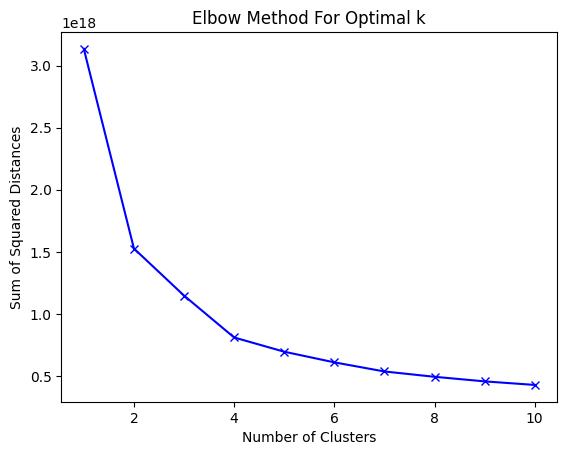

In [ ]:
# # Assuming X is your standardized data
# sum_of_squared_distances = []
# K = range(1, 11)

# for k in K:
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(X)
#     sum_of_squared_distances.append(kmeans.inertia_)

# plt.plot(K, sum_of_squared_distances, 'bx-')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Sum of Squared Distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()